In [1]:
# Let's import the necessary libraries

import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)

from munkres import Munkres
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")


# Flats_Data


In [2]:
# Loading the flats_dataset

flats_df = pd.read_csv("flats_v2.csv")
flats_df.head()


,FloorNo,FlatNo,Typology,NoOfParkings,Time_To_Podium_1,Time_To_Podium_2,Time_To_Podium_3,Time_To_Podium_4,Time_To_Podium_5,Time_To_Podium_6,Time_To_Podium_7,Time_To_Podium_8,Time_To_Podium_9
0,14,C-1401,3BHK,2,26,24,22,20,18,16,14,12,10
1,14,C-1402,3BHK,2,26,24,22,20,18,16,14,12,10
2,14,C-1403,3BHK,2,26,24,22,20,18,16,14,12,10
3,14,C-1404,4BHK,3,26,24,22,20,18,16,14,12,10
4,15,C-1501,3BHK,2,28,26,24,22,20,18,16,14,12


In [3]:
# Print the shape of the flats_df
print(flats_df.shape)

(208, 13)


In [4]:
# Details about the flats_df
flats_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   FloorNo           208 non-null    int64 
 1   FlatNo            208 non-null    object
 2   Typology          208 non-null    object
 3   NoOfParkings      208 non-null    int64 
 4   Time_To_Podium_1  208 non-null    int64 
 5   Time_To_Podium_2  208 non-null    int64 
 6   Time_To_Podium_3  208 non-null    int64 
 7   Time_To_Podium_4  208 non-null    int64 
 8   Time_To_Podium_5  208 non-null    int64 
 9   Time_To_Podium_6  208 non-null    int64 
 10  Time_To_Podium_7  208 non-null    int64 
 11  Time_To_Podium_8  208 non-null    int64 
 12  Time_To_Podium_9  208 non-null    int64 
dtypes: int64(11), object(2)
memory usage: 21.2+ KB


In [5]:
# Check how many parkings need to be assigned
print(f"Total {flats_df['NoOfParkings'].sum()} parkings need to be assigned")

Total 468 parkings need to be assigned


In [6]:
# let's create a duplicate record for each flats no of parkings

new_flats_data = flats_df.loc[flats_df.index.repeat(flats_df['NoOfParkings'])].reset_index(drop=True)
print(new_flats_data.shape)
new_flats_data.head()

(468, 13)


,FloorNo,FlatNo,Typology,NoOfParkings,Time_To_Podium_1,Time_To_Podium_2,Time_To_Podium_3,Time_To_Podium_4,Time_To_Podium_5,Time_To_Podium_6,Time_To_Podium_7,Time_To_Podium_8,Time_To_Podium_9
0,14,C-1401,3BHK,2,26,24,22,20,18,16,14,12,10
1,14,C-1401,3BHK,2,26,24,22,20,18,16,14,12,10
2,14,C-1402,3BHK,2,26,24,22,20,18,16,14,12,10
3,14,C-1402,3BHK,2,26,24,22,20,18,16,14,12,10
4,14,C-1403,3BHK,2,26,24,22,20,18,16,14,12,10


In [7]:
# Create a new column 'Rank' based on the count of each value in 'Column1'
new_flats_data['Rank'] = new_flats_data.groupby('FlatNo').cumcount() + 1

# Display the DataFrame
new_flats_data.head()

,FloorNo,FlatNo,Typology,NoOfParkings,Time_To_Podium_1,Time_To_Podium_2,Time_To_Podium_3,Time_To_Podium_4,Time_To_Podium_5,Time_To_Podium_6,Time_To_Podium_7,Time_To_Podium_8,Time_To_Podium_9,Rank
0,14,C-1401,3BHK,2,26,24,22,20,18,16,14,12,10,1
1,14,C-1401,3BHK,2,26,24,22,20,18,16,14,12,10,2
2,14,C-1402,3BHK,2,26,24,22,20,18,16,14,12,10,1
3,14,C-1402,3BHK,2,26,24,22,20,18,16,14,12,10,2
4,14,C-1403,3BHK,2,26,24,22,20,18,16,14,12,10,1


In [8]:
# Let's create unique flat_numbers
new_flats_data['unique_flat_no'] = new_flats_data['Rank'].astype(str) + "-" + new_flats_data['FlatNo']
new_flats_data.head()

,FloorNo,FlatNo,Typology,NoOfParkings,Time_To_Podium_1,Time_To_Podium_2,Time_To_Podium_3,Time_To_Podium_4,Time_To_Podium_5,Time_To_Podium_6,Time_To_Podium_7,Time_To_Podium_8,Time_To_Podium_9,Rank,unique_flat_no
0,14,C-1401,3BHK,2,26,24,22,20,18,16,14,12,10,1,1-C-1401
1,14,C-1401,3BHK,2,26,24,22,20,18,16,14,12,10,2,2-C-1401
2,14,C-1402,3BHK,2,26,24,22,20,18,16,14,12,10,1,1-C-1402
3,14,C-1402,3BHK,2,26,24,22,20,18,16,14,12,10,2,2-C-1402
4,14,C-1403,3BHK,2,26,24,22,20,18,16,14,12,10,1,1-C-1403


In [9]:
# Let's drop the columns = ['FlatNo','Typology','FloorNo','NoOfParkings']
new_flats_data = new_flats_data.drop(columns=['FlatNo','Typology','FloorNo','NoOfParkings'])
new_flats_data.head()

,Time_To_Podium_1,Time_To_Podium_2,Time_To_Podium_3,Time_To_Podium_4,Time_To_Podium_5,Time_To_Podium_6,Time_To_Podium_7,Time_To_Podium_8,Time_To_Podium_9,Rank,unique_flat_no
0,26,24,22,20,18,16,14,12,10,1,1-C-1401
1,26,24,22,20,18,16,14,12,10,2,2-C-1401
2,26,24,22,20,18,16,14,12,10,1,1-C-1402
3,26,24,22,20,18,16,14,12,10,2,2-C-1402
4,26,24,22,20,18,16,14,12,10,1,1-C-1403


In [10]:
# Let's add the key column for merging the data
new_flats_data['key'] = 1
new_flats_data.head()

,Time_To_Podium_1,Time_To_Podium_2,Time_To_Podium_3,Time_To_Podium_4,Time_To_Podium_5,Time_To_Podium_6,Time_To_Podium_7,Time_To_Podium_8,Time_To_Podium_9,Rank,unique_flat_no,key
0,26,24,22,20,18,16,14,12,10,1,1-C-1401,1
1,26,24,22,20,18,16,14,12,10,2,2-C-1401,1
2,26,24,22,20,18,16,14,12,10,1,1-C-1402,1
3,26,24,22,20,18,16,14,12,10,2,2-C-1402,1
4,26,24,22,20,18,16,14,12,10,1,1-C-1403,1


In [11]:
cols_to_modify = []
 
for col in new_flats_data.columns[:-2]:
    cols_to_modify.append(col)
    
cols_to_modify

['Time_To_Podium_1',
 'Time_To_Podium_2',
 'Time_To_Podium_3',
 'Time_To_Podium_4',
 'Time_To_Podium_5',
 'Time_To_Podium_6',
 'Time_To_Podium_7',
 'Time_To_Podium_8',
 'Time_To_Podium_9',
 'Rank']

## Parkings


In [12]:
# Let read the parking data
parking_data = pd.read_csv('parking_data_v2.csv')
parking_data.head()

,Podium,ParkingNo,Parking Slot,TravelTimeToLobby,TravelTimeToExitGate
0,Podium 2,1,Podium 2-1,10,45
1,Podium 2,2,Podium 2-2,10,45
2,Podium 2,3,Podium 2-3,10,45
3,Podium 2,4,Podium 2-4,10,45
4,Podium 2,5,Podium 2-5,10,45


In [13]:
parking_data['TotalTime'] = parking_data['TravelTimeToExitGate'] + parking_data['TravelTimeToLobby']
parking_data.head()

,Podium,ParkingNo,Parking Slot,TravelTimeToLobby,TravelTimeToExitGate,TotalTime
0,Podium 2,1,Podium 2-1,10,45,55
1,Podium 2,2,Podium 2-2,10,45,55
2,Podium 2,3,Podium 2-3,10,45,55
3,Podium 2,4,Podium 2-4,10,45,55
4,Podium 2,5,Podium 2-5,10,45,55


In [14]:
#Let's drop the columns TravelTimeToLobby, TravelTimeToExitGate,Podium

parking_data = parking_data.drop(columns=['TravelTimeToLobby','TravelTimeToExitGate','Podium','ParkingNo'])
parking_data.head()

,Parking Slot,TotalTime
0,Podium 2-1,55
1,Podium 2-2,55
2,Podium 2-3,55
3,Podium 2-4,55
4,Podium 2-5,55


In [15]:
# Let's replace the space with underscore in parking slot column

parking_data['Parking Slot'] = parking_data['Parking Slot'].str.replace(' ',"_")
parking_data.head()

,Parking Slot,TotalTime
0,Podium_2-1,55
1,Podium_2-2,55
2,Podium_2-3,55
3,Podium_2-4,55
4,Podium_2-5,55


In [16]:
# Details about the parking dataset
parking_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Parking Slot  801 non-null    object
 1   TotalTime     801 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 12.6+ KB


In [17]:
# Transposing the dataframe to convert into matrix
parking_data_transpose = pd.DataFrame(parking_data.transpose()).reset_index()
parking_data_transpose.columns = parking_data_transpose.iloc[0]
parking_data_transpose.head()

,Parking Slot,Podium_2-1,Podium_2-2,Podium_2-3,Podium_2-4,Podium_2-5,Podium_2-6,Podium_2-7,Podium_2-8,Podium_2-9,Podium_2-10,Podium_2-11,Podium_2-12,Podium_2-13,Podium_2-14,Podium_2-15,Podium_2-16,Podium_2-17,Podium_2-18,Podium_2-19,Podium_2-20,Podium_2-21,Podium_2-22,Podium_2-23,Podium_2-24,Podium_2-25,Podium_2-26,Podium_2-27,Podium_2-28,Podium_2-29,Podium_2-30,Podium_2-31,Podium_2-32,Podium_2-33,Podium_2-34,Podium_2-35,Podium_2-36,Podium_2-37,Podium_2-38,Podium_2-39,Podium_2-40,Podium_2-41,Podium_2-42,Podium_2-43,Podium_2-44,Podium_2-45,Podium_2-46,Podium_2-47,Podium_2-48,Podium_2-49,Podium_2-50,Podium_2-51,Podium_2-52,Podium_2-53,Podium_2-54,Podium_2-55,Podium_2-56,Podium_2-57,Podium_2-58,Podium_2-59,Podium_2-60,Podium_2-61,Podium_2-62,Podium_2-63,Podium_2-64,Podium_2-65,Podium_2-66,Podium_2-67,Podium_2-68,Podium_2-69,Podium_2-70,Podium_2-71,Podium_2-72,Podium_2-73,Podium_2-74,Podium_2-75,Podium_2-76,Podium_2-77,Podium_2-78,Podium_2-79,Podium_2-80,Podium_2-81,Podium_2-82,Podium_2-83,Podium_2-84,Podium_2-85,Podium_2-86,Podium_2-87,Podium_2-88,Podium_2-89,Podium_4-1,Podium_4-2,Podium_4-3,Podium_4-4,Podium_4-5,Podium_4-6,Podium_4-7,Podium_4-8,Podium_4-9,Podium_4-10,Podium_4-11,Podium_4-12,Podium_4-13,Podium_4-14,Podium_4-15,Podium_4-16,Podium_4-17,Podium_4-18,Podium_4-19,Podium_4-20,Podium_4-21,Podium_4-22,Podium_4-23,Podium_4-24,Podium_4-25,Podium_4-26,Podium_4-27,Podium_4-28,Podium_4-29,Podium_4-30,Podium_4-31,Podium_4-32,Podium_4-33,Podium_4-34,Podium_4-35,Podium_4-36,Podium_4-37,Podium_4-38,Podium_4-39,Podium_4-40,Podium_4-41,Podium_4-42,Podium_4-43,Podium_4-44,Podium_4-45,Podium_4-46,Podium_4-47,Podium_4-48,Podium_4-49,Podium_4-50,Podium_4-51,Podium_4-52,Podium_4-53,Podium_4-54,Podium_4-55,Podium_4-56,Podium_4-57,Podium_4-58,Podium_4-59,Podium_4-60,Podium_4-61,Podium_4-62,Podium_4-63,Podium_4-64,Podium_4-65,Podium_4-66,Podium_4-67,Podium_4-68,Podium_4-69,Podium_4-70,Podium_4-71,Podium_4-72,Podium_4-73,Podium_4-74,Podium_4-75,Podium_4-76,Podium_4-77,Podium_4-78,Podium_4-79,Podium_4-80,Podium_4-81,Podium_4-82,Podium_4-83,Podium_4-84,Podium_4-85,Podium_4-86,Podium_4-87,Podium_4-88,Podium_4-89,Podium_5-1,Podium_5-2,Podium_5-3,Podium_5-4,Podium_5-5,Podium_5-6,Podium_5-7,Podium_5-8,Podium_5-9,Podium_5-10,Podium_5-11,Podium_5-12,Podium_5-13,Podium_5-14,Podium_5-15,Podium_5-16,Podium_5-17,Podium_5-18,Podium_5-19,Podium_5-20,Podium_5-21,Podium_5-22,Podium_5-23,Podium_5-24,Podium_5-25,Podium_5-26,Podium_5-27,Podium_5-28,Podium_5-29,Podium_5-30,Podium_5-31,Podium_5-32,Podium_5-33,Podium_5-34,Podium_5-35,Podium_5-36,Podium_5-37,Podium_5-38,Podium_5-39,Podium_5-40,Podium_5-41,Podium_5-42,Podium_5-43,Podium_5-44,Podium_5-45,Podium_5-46,Podium_5-47,Podium_5-48,Podium_5-49,Podium_5-50,Podium_5-51,Podium_5-52,Podium_5-53,Podium_5-54,Podium_5-55,Podium_5-56,Podium_5-57,Podium_5-58,Podium_5-59,Podium_5-60,Podium_5-61,Podium_5-62,Podium_5-63,Podium_5-64,Podium_5-65,Podium_5-66,Podium_5-67,Podium_5-68,Podium_5-69,Podium_5-70,Podium_5-71,Podium_5-72,Podium_5-73,Podium_5-74,Podium_5-75,Podium_5-76,Podium_5-77,Podium_5-78,Podium_5-79,Podium_5-80,Podium_5-81,Podium_5-82,Podium_5-83,Podium_5-84,Podium_5-85,Podium_5-86,Podium_5-87,Podium_5-88,Podium_5-89,Podium_6-1,Podium_6-2,Podium_6-3,Podium_6-4,Podium_6-5,Podium_6-6,Podium_6-7,Podium_6-8,Podium_6-9,Podium_6-10,Podium_6-11,Podium_6-12,Podium_6-13,Podium_6-14,Podium_6-15,Podium_6-16,Podium_6-17,Podium_6-18,Podium_6-19,Podium_6-20,Podium_6-21,Podium_6-22,Podium_6-23,Podium_6-24,Podium_6-25,Podium_6-26,Podium_6-27,Podium_6-28,Podium_6-29,Podium_6-30,Podium_6-31,Podium_6-32,Podium_6-33,Podium_6-34,Podium_6-35,Podium_6-36,Podium_6-37,Podium_6-38,Podium_6-39,Podium_6-40,Podium_6-41,Podium_6-42,Podium_6-43,Podium_6-44,Podium_6-45,Podium_6-46,Podium_6-47,Podium_6-48,Podium_6-49,Podium_6-50,Podium_6-51,Podium_6-52,Podium_6-53,Podium_6-54,Podium_6-55,Podium_6-56,Podium_6-57,Podium_6-58,Podium_6-59,Podium_6-60,Podium_6-61,Podium_6-62,Podium_6-63,Podium_6-64,Podium_6-65,Podium_6-66,Podium_6-67,Podium_6-68,Po

In [18]:
#Let's drop the first row, as it is now redundant
parking_data_transpose = parking_data_transpose.iloc[1:,:]
parking_data_transpose


,Parking Slot,Podium_2-1,Podium_2-2,Podium_2-3,Podium_2-4,Podium_2-5,Podium_2-6,Podium_2-7,Podium_2-8,Podium_2-9,Podium_2-10,Podium_2-11,Podium_2-12,Podium_2-13,Podium_2-14,Podium_2-15,Podium_2-16,Podium_2-17,Podium_2-18,Podium_2-19,Podium_2-20,Podium_2-21,Podium_2-22,Podium_2-23,Podium_2-24,Podium_2-25,Podium_2-26,Podium_2-27,Podium_2-28,Podium_2-29,Podium_2-30,Podium_2-31,Podium_2-32,Podium_2-33,Podium_2-34,Podium_2-35,Podium_2-36,Podium_2-37,Podium_2-38,Podium_2-39,Podium_2-40,Podium_2-41,Podium_2-42,Podium_2-43,Podium_2-44,Podium_2-45,Podium_2-46,Podium_2-47,Podium_2-48,Podium_2-49,Podium_2-50,Podium_2-51,Podium_2-52,Podium_2-53,Podium_2-54,Podium_2-55,Podium_2-56,Podium_2-57,Podium_2-58,Podium_2-59,Podium_2-60,Podium_2-61,Podium_2-62,Podium_2-63,Podium_2-64,Podium_2-65,Podium_2-66,Podium_2-67,Podium_2-68,Podium_2-69,Podium_2-70,Podium_2-71,Podium_2-72,Podium_2-73,Podium_2-74,Podium_2-75,Podium_2-76,Podium_2-77,Podium_2-78,Podium_2-79,Podium_2-80,Podium_2-81,Podium_2-82,Podium_2-83,Podium_2-84,Podium_2-85,Podium_2-86,Podium_2-87,Podium_2-88,Podium_2-89,Podium_4-1,Podium_4-2,Podium_4-3,Podium_4-4,Podium_4-5,Podium_4-6,Podium_4-7,Podium_4-8,Podium_4-9,Podium_4-10,Podium_4-11,Podium_4-12,Podium_4-13,Podium_4-14,Podium_4-15,Podium_4-16,Podium_4-17,Podium_4-18,Podium_4-19,Podium_4-20,Podium_4-21,Podium_4-22,Podium_4-23,Podium_4-24,Podium_4-25,Podium_4-26,Podium_4-27,Podium_4-28,Podium_4-29,Podium_4-30,Podium_4-31,Podium_4-32,Podium_4-33,Podium_4-34,Podium_4-35,Podium_4-36,Podium_4-37,Podium_4-38,Podium_4-39,Podium_4-40,Podium_4-41,Podium_4-42,Podium_4-43,Podium_4-44,Podium_4-45,Podium_4-46,Podium_4-47,Podium_4-48,Podium_4-49,Podium_4-50,Podium_4-51,Podium_4-52,Podium_4-53,Podium_4-54,Podium_4-55,Podium_4-56,Podium_4-57,Podium_4-58,Podium_4-59,Podium_4-60,Podium_4-61,Podium_4-62,Podium_4-63,Podium_4-64,Podium_4-65,Podium_4-66,Podium_4-67,Podium_4-68,Podium_4-69,Podium_4-70,Podium_4-71,Podium_4-72,Podium_4-73,Podium_4-74,Podium_4-75,Podium_4-76,Podium_4-77,Podium_4-78,Podium_4-79,Podium_4-80,Podium_4-81,Podium_4-82,Podium_4-83,Podium_4-84,Podium_4-85,Podium_4-86,Podium_4-87,Podium_4-88,Podium_4-89,Podium_5-1,Podium_5-2,Podium_5-3,Podium_5-4,Podium_5-5,Podium_5-6,Podium_5-7,Podium_5-8,Podium_5-9,Podium_5-10,Podium_5-11,Podium_5-12,Podium_5-13,Podium_5-14,Podium_5-15,Podium_5-16,Podium_5-17,Podium_5-18,Podium_5-19,Podium_5-20,Podium_5-21,Podium_5-22,Podium_5-23,Podium_5-24,Podium_5-25,Podium_5-26,Podium_5-27,Podium_5-28,Podium_5-29,Podium_5-30,Podium_5-31,Podium_5-32,Podium_5-33,Podium_5-34,Podium_5-35,Podium_5-36,Podium_5-37,Podium_5-38,Podium_5-39,Podium_5-40,Podium_5-41,Podium_5-42,Podium_5-43,Podium_5-44,Podium_5-45,Podium_5-46,Podium_5-47,Podium_5-48,Podium_5-49,Podium_5-50,Podium_5-51,Podium_5-52,Podium_5-53,Podium_5-54,Podium_5-55,Podium_5-56,Podium_5-57,Podium_5-58,Podium_5-59,Podium_5-60,Podium_5-61,Podium_5-62,Podium_5-63,Podium_5-64,Podium_5-65,Podium_5-66,Podium_5-67,Podium_5-68,Podium_5-69,Podium_5-70,Podium_5-71,Podium_5-72,Podium_5-73,Podium_5-74,Podium_5-75,Podium_5-76,Podium_5-77,Podium_5-78,Podium_5-79,Podium_5-80,Podium_5-81,Podium_5-82,Podium_5-83,Podium_5-84,Podium_5-85,Podium_5-86,Podium_5-87,Podium_5-88,Podium_5-89,Podium_6-1,Podium_6-2,Podium_6-3,Podium_6-4,Podium_6-5,Podium_6-6,Podium_6-7,Podium_6-8,Podium_6-9,Podium_6-10,Podium_6-11,Podium_6-12,Podium_6-13,Podium_6-14,Podium_6-15,Podium_6-16,Podium_6-17,Podium_6-18,Podium_6-19,Podium_6-20,Podium_6-21,Podium_6-22,Podium_6-23,Podium_6-24,Podium_6-25,Podium_6-26,Podium_6-27,Podium_6-28,Podium_6-29,Podium_6-30,Podium_6-31,Podium_6-32,Podium_6-33,Podium_6-34,Podium_6-35,Podium_6-36,Podium_6-37,Podium_6-38,Podium_6-39,Podium_6-40,Podium_6-41,Podium_6-42,Podium_6-43,Podium_6-44,Podium_6-45,Podium_6-46,Podium_6-47,Podium_6-48,Podium_6-49,Podium_6-50,Podium_6-51,Podium_6-52,Podium_6-53,Podium_6-54,Podium_6-55,Podium_6-56,Podium_6-57,Podium_6-58,Podium_6-59,Podium_6-60,Podium_6-61,Podium_6-62,Podium_6-63,Podium_6-64,Podium_6-65,Podium_6-66,Podium_6-67,Podium_6-68,Po

In [19]:
# Let's add a key column for merging purposes
parking_data_transpose['key'] = 1
print(parking_data_transpose.shape)
parking_data_transpose



(1, 803)


,Parking Slot,Podium_2-1,Podium_2-2,Podium_2-3,Podium_2-4,Podium_2-5,Podium_2-6,Podium_2-7,Podium_2-8,Podium_2-9,Podium_2-10,Podium_2-11,Podium_2-12,Podium_2-13,Podium_2-14,Podium_2-15,Podium_2-16,Podium_2-17,Podium_2-18,Podium_2-19,Podium_2-20,Podium_2-21,Podium_2-22,Podium_2-23,Podium_2-24,Podium_2-25,Podium_2-26,Podium_2-27,Podium_2-28,Podium_2-29,Podium_2-30,Podium_2-31,Podium_2-32,Podium_2-33,Podium_2-34,Podium_2-35,Podium_2-36,Podium_2-37,Podium_2-38,Podium_2-39,Podium_2-40,Podium_2-41,Podium_2-42,Podium_2-43,Podium_2-44,Podium_2-45,Podium_2-46,Podium_2-47,Podium_2-48,Podium_2-49,Podium_2-50,Podium_2-51,Podium_2-52,Podium_2-53,Podium_2-54,Podium_2-55,Podium_2-56,Podium_2-57,Podium_2-58,Podium_2-59,Podium_2-60,Podium_2-61,Podium_2-62,Podium_2-63,Podium_2-64,Podium_2-65,Podium_2-66,Podium_2-67,Podium_2-68,Podium_2-69,Podium_2-70,Podium_2-71,Podium_2-72,Podium_2-73,Podium_2-74,Podium_2-75,Podium_2-76,Podium_2-77,Podium_2-78,Podium_2-79,Podium_2-80,Podium_2-81,Podium_2-82,Podium_2-83,Podium_2-84,Podium_2-85,Podium_2-86,Podium_2-87,Podium_2-88,Podium_2-89,Podium_4-1,Podium_4-2,Podium_4-3,Podium_4-4,Podium_4-5,Podium_4-6,Podium_4-7,Podium_4-8,Podium_4-9,Podium_4-10,Podium_4-11,Podium_4-12,Podium_4-13,Podium_4-14,Podium_4-15,Podium_4-16,Podium_4-17,Podium_4-18,Podium_4-19,Podium_4-20,Podium_4-21,Podium_4-22,Podium_4-23,Podium_4-24,Podium_4-25,Podium_4-26,Podium_4-27,Podium_4-28,Podium_4-29,Podium_4-30,Podium_4-31,Podium_4-32,Podium_4-33,Podium_4-34,Podium_4-35,Podium_4-36,Podium_4-37,Podium_4-38,Podium_4-39,Podium_4-40,Podium_4-41,Podium_4-42,Podium_4-43,Podium_4-44,Podium_4-45,Podium_4-46,Podium_4-47,Podium_4-48,Podium_4-49,Podium_4-50,Podium_4-51,Podium_4-52,Podium_4-53,Podium_4-54,Podium_4-55,Podium_4-56,Podium_4-57,Podium_4-58,Podium_4-59,Podium_4-60,Podium_4-61,Podium_4-62,Podium_4-63,Podium_4-64,Podium_4-65,Podium_4-66,Podium_4-67,Podium_4-68,Podium_4-69,Podium_4-70,Podium_4-71,Podium_4-72,Podium_4-73,Podium_4-74,Podium_4-75,Podium_4-76,Podium_4-77,Podium_4-78,Podium_4-79,Podium_4-80,Podium_4-81,Podium_4-82,Podium_4-83,Podium_4-84,Podium_4-85,Podium_4-86,Podium_4-87,Podium_4-88,Podium_4-89,Podium_5-1,Podium_5-2,Podium_5-3,Podium_5-4,Podium_5-5,Podium_5-6,Podium_5-7,Podium_5-8,Podium_5-9,Podium_5-10,Podium_5-11,Podium_5-12,Podium_5-13,Podium_5-14,Podium_5-15,Podium_5-16,Podium_5-17,Podium_5-18,Podium_5-19,Podium_5-20,Podium_5-21,Podium_5-22,Podium_5-23,Podium_5-24,Podium_5-25,Podium_5-26,Podium_5-27,Podium_5-28,Podium_5-29,Podium_5-30,Podium_5-31,Podium_5-32,Podium_5-33,Podium_5-34,Podium_5-35,Podium_5-36,Podium_5-37,Podium_5-38,Podium_5-39,Podium_5-40,Podium_5-41,Podium_5-42,Podium_5-43,Podium_5-44,Podium_5-45,Podium_5-46,Podium_5-47,Podium_5-48,Podium_5-49,Podium_5-50,Podium_5-51,Podium_5-52,Podium_5-53,Podium_5-54,Podium_5-55,Podium_5-56,Podium_5-57,Podium_5-58,Podium_5-59,Podium_5-60,Podium_5-61,Podium_5-62,Podium_5-63,Podium_5-64,Podium_5-65,Podium_5-66,Podium_5-67,Podium_5-68,Podium_5-69,Podium_5-70,Podium_5-71,Podium_5-72,Podium_5-73,Podium_5-74,Podium_5-75,Podium_5-76,Podium_5-77,Podium_5-78,Podium_5-79,Podium_5-80,Podium_5-81,Podium_5-82,Podium_5-83,Podium_5-84,Podium_5-85,Podium_5-86,Podium_5-87,Podium_5-88,Podium_5-89,Podium_6-1,Podium_6-2,Podium_6-3,Podium_6-4,Podium_6-5,Podium_6-6,Podium_6-7,Podium_6-8,Podium_6-9,Podium_6-10,Podium_6-11,Podium_6-12,Podium_6-13,Podium_6-14,Podium_6-15,Podium_6-16,Podium_6-17,Podium_6-18,Podium_6-19,Podium_6-20,Podium_6-21,Podium_6-22,Podium_6-23,Podium_6-24,Podium_6-25,Podium_6-26,Podium_6-27,Podium_6-28,Podium_6-29,Podium_6-30,Podium_6-31,Podium_6-32,Podium_6-33,Podium_6-34,Podium_6-35,Podium_6-36,Podium_6-37,Podium_6-38,Podium_6-39,Podium_6-40,Podium_6-41,Podium_6-42,Podium_6-43,Podium_6-44,Podium_6-45,Podium_6-46,Podium_6-47,Podium_6-48,Podium_6-49,Podium_6-50,Podium_6-51,Podium_6-52,Podium_6-53,Podium_6-54,Podium_6-55,Podium_6-56,Podium_6-57,Podium_6-58,Podium_6-59,Podium_6-60,Podium_6-61,Podium_6-62,Podium_6-63,Podium_6-64,Podium_6-65,Podium_6-66,Podium_6-67,Podium_6-68,Po

# Iteration 1


In [20]:
# Let's iterate the no 1 parking for flats data

flats_df_1 = new_flats_data[new_flats_data['Rank'] == 1]
flats_df_1 = flats_df_1.reset_index(drop='index')
print(flats_df_1.shape)
flats_df_1.head()   

(208, 12)


,Time_To_Podium_1,Time_To_Podium_2,Time_To_Podium_3,Time_To_Podium_4,Time_To_Podium_5,Time_To_Podium_6,Time_To_Podium_7,Time_To_Podium_8,Time_To_Podium_9,Rank,unique_flat_no,key
0,26,24,22,20,18,16,14,12,10,1,1-C-1401,1
1,26,24,22,20,18,16,14,12,10,1,1-C-1402,1
2,26,24,22,20,18,16,14,12,10,1,1-C-1403,1
3,26,24,22,20,18,16,14,12,10,1,1-C-1404,1
4,28,26,24,22,20,18,16,14,12,1,1-C-1501,1


In [21]:
final_df_iter_1 = pd.merge(flats_df_1,parking_data_transpose,on='key',how='outer')
print(final_df_iter_1.shape)

final_df_iter_1.head()

(208, 814)


,Time_To_Podium_1,Time_To_Podium_2,Time_To_Podium_3,Time_To_Podium_4,Time_To_Podium_5,Time_To_Podium_6,Time_To_Podium_7,Time_To_Podium_8,Time_To_Podium_9,Rank,unique_flat_no,key,Parking Slot,Podium_2-1,Podium_2-2,Podium_2-3,Podium_2-4,Podium_2-5,Podium_2-6,Podium_2-7,Podium_2-8,Podium_2-9,Podium_2-10,Podium_2-11,Podium_2-12,Podium_2-13,Podium_2-14,Podium_2-15,Podium_2-16,Podium_2-17,Podium_2-18,Podium_2-19,Podium_2-20,Podium_2-21,Podium_2-22,Podium_2-23,Podium_2-24,Podium_2-25,Podium_2-26,Podium_2-27,Podium_2-28,Podium_2-29,Podium_2-30,Podium_2-31,Podium_2-32,Podium_2-33,Podium_2-34,Podium_2-35,Podium_2-36,Podium_2-37,Podium_2-38,Podium_2-39,Podium_2-40,Podium_2-41,Podium_2-42,Podium_2-43,Podium_2-44,Podium_2-45,Podium_2-46,Podium_2-47,Podium_2-48,Podium_2-49,Podium_2-50,Podium_2-51,Podium_2-52,Podium_2-53,Podium_2-54,Podium_2-55,Podium_2-56,Podium_2-57,Podium_2-58,Podium_2-59,Podium_2-60,Podium_2-61,Podium_2-62,Podium_2-63,Podium_2-64,Podium_2-65,Podium_2-66,Podium_2-67,Podium_2-68,Podium_2-69,Podium_2-70,Podium_2-71,Podium_2-72,Podium_2-73,Podium_2-74,Podium_2-75,Podium_2-76,Podium_2-77,Podium_2-78,Podium_2-79,Podium_2-80,Podium_2-81,Podium_2-82,Podium_2-83,Podium_2-84,Podium_2-85,Podium_2-86,Podium_2-87,Podium_2-88,Podium_2-89,Podium_4-1,Podium_4-2,Podium_4-3,Podium_4-4,Podium_4-5,Podium_4-6,Podium_4-7,Podium_4-8,Podium_4-9,Podium_4-10,Podium_4-11,Podium_4-12,Podium_4-13,Podium_4-14,Podium_4-15,Podium_4-16,Podium_4-17,Podium_4-18,Podium_4-19,Podium_4-20,Podium_4-21,Podium_4-22,Podium_4-23,Podium_4-24,Podium_4-25,Podium_4-26,Podium_4-27,Podium_4-28,Podium_4-29,Podium_4-30,Podium_4-31,Podium_4-32,Podium_4-33,Podium_4-34,Podium_4-35,Podium_4-36,Podium_4-37,Podium_4-38,Podium_4-39,Podium_4-40,Podium_4-41,Podium_4-42,Podium_4-43,Podium_4-44,Podium_4-45,Podium_4-46,Podium_4-47,Podium_4-48,Podium_4-49,Podium_4-50,Podium_4-51,Podium_4-52,Podium_4-53,Podium_4-54,Podium_4-55,Podium_4-56,Podium_4-57,Podium_4-58,Podium_4-59,Podium_4-60,Podium_4-61,Podium_4-62,Podium_4-63,Podium_4-64,Podium_4-65,Podium_4-66,Podium_4-67,Podium_4-68,Podium_4-69,Podium_4-70,Podium_4-71,Podium_4-72,Podium_4-73,Podium_4-74,Podium_4-75,Podium_4-76,Podium_4-77,Podium_4-78,Podium_4-79,Podium_4-80,Podium_4-81,Podium_4-82,Podium_4-83,Podium_4-84,Podium_4-85,Podium_4-86,Podium_4-87,Podium_4-88,Podium_4-89,Podium_5-1,Podium_5-2,Podium_5-3,Podium_5-4,Podium_5-5,Podium_5-6,Podium_5-7,Podium_5-8,Podium_5-9,Podium_5-10,Podium_5-11,Podium_5-12,Podium_5-13,Podium_5-14,Podium_5-15,Podium_5-16,Podium_5-17,Podium_5-18,Podium_5-19,Podium_5-20,Podium_5-21,Podium_5-22,Podium_5-23,Podium_5-24,Podium_5-25,Podium_5-26,Podium_5-27,Podium_5-28,Podium_5-29,Podium_5-30,Podium_5-31,Podium_5-32,Podium_5-33,Podium_5-34,Podium_5-35,Podium_5-36,Podium_5-37,Podium_5-38,Podium_5-39,Podium_5-40,Podium_5-41,Podium_5-42,Podium_5-43,Podium_5-44,Podium_5-45,Podium_5-46,Podium_5-47,Podium_5-48,Podium_5-49,Podium_5-50,Podium_5-51,Podium_5-52,Podium_5-53,Podium_5-54,Podium_5-55,Podium_5-56,Podium_5-57,Podium_5-58,Podium_5-59,Podium_5-60,Podium_5-61,Podium_5-62,Podium_5-63,Podium_5-64,Podium_5-65,Podium_5-66,Podium_5-67,Podium_5-68,Podium_5-69,Podium_5-70,Podium_5-71,Podium_5-72,Podium_5-73,Podium_5-74,Podium_5-75,Podium_5-76,Podium_5-77,Podium_5-78,Podium_5-79,Podium_5-80,Podium_5-81,Podium_5-82,Podium_5-83,Podium_5-84,Podium_5-85,Podium_5-86,Podium_5-87,Podium_5-88,Podium_5-89,Podium_6-1,Podium_6-2,Podium_6-3,Podium_6-4,Podium_6-5,Podium_6-6,Podium_6-7,Podium_6-8,Podium_6-9,Podium_6-10,Podium_6-11,Podium_6-12,Podium_6-13,Podium_6-14,Podium_6-15,Podium_6-16,Podium_6-17,Podium_6-18,Podium_6-19,Podium_6-20,Podium_6-21,Podium_6-22,Podium_6-23,Podium_6-24,Podium_6-25,Podium_6-26,Podium_6-27,Podium_6-28,Podium_6-29,Podium_6-30,Podium_6-31,Podium_6-32,Podium_6-33,Podium_6-34,Podium_6-35,Podium_6-36,Podium_6-37,Podium_6-38,Podium_6-39,Podium_6-40,Podium_6-41,Podium_6-42,Podium_6-43,Podium_6-44,Podium_6-45,Podium_6-46,Podium_6-47,Podium_6-48,Podium_6-49,Podium_6-50,Podium_6-51,Podium_6-52,Podium_6-53,Podiu

In [22]:
final_df_iter_1 = final_df_iter_1.drop(columns=['Parking Slot','key','Rank'])
print(final_df_iter_1.shape)
final_df_iter_1.head()

(208, 811)


,Time_To_Podium_1,Time_To_Podium_2,Time_To_Podium_3,Time_To_Podium_4,Time_To_Podium_5,Time_To_Podium_6,Time_To_Podium_7,Time_To_Podium_8,Time_To_Podium_9,unique_flat_no,Podium_2-1,Podium_2-2,Podium_2-3,Podium_2-4,Podium_2-5,Podium_2-6,Podium_2-7,Podium_2-8,Podium_2-9,Podium_2-10,Podium_2-11,Podium_2-12,Podium_2-13,Podium_2-14,Podium_2-15,Podium_2-16,Podium_2-17,Podium_2-18,Podium_2-19,Podium_2-20,Podium_2-21,Podium_2-22,Podium_2-23,Podium_2-24,Podium_2-25,Podium_2-26,Podium_2-27,Podium_2-28,Podium_2-29,Podium_2-30,Podium_2-31,Podium_2-32,Podium_2-33,Podium_2-34,Podium_2-35,Podium_2-36,Podium_2-37,Podium_2-38,Podium_2-39,Podium_2-40,Podium_2-41,Podium_2-42,Podium_2-43,Podium_2-44,Podium_2-45,Podium_2-46,Podium_2-47,Podium_2-48,Podium_2-49,Podium_2-50,Podium_2-51,Podium_2-52,Podium_2-53,Podium_2-54,Podium_2-55,Podium_2-56,Podium_2-57,Podium_2-58,Podium_2-59,Podium_2-60,Podium_2-61,Podium_2-62,Podium_2-63,Podium_2-64,Podium_2-65,Podium_2-66,Podium_2-67,Podium_2-68,Podium_2-69,Podium_2-70,Podium_2-71,Podium_2-72,Podium_2-73,Podium_2-74,Podium_2-75,Podium_2-76,Podium_2-77,Podium_2-78,Podium_2-79,Podium_2-80,Podium_2-81,Podium_2-82,Podium_2-83,Podium_2-84,Podium_2-85,Podium_2-86,Podium_2-87,Podium_2-88,Podium_2-89,Podium_4-1,Podium_4-2,Podium_4-3,Podium_4-4,Podium_4-5,Podium_4-6,Podium_4-7,Podium_4-8,Podium_4-9,Podium_4-10,Podium_4-11,Podium_4-12,Podium_4-13,Podium_4-14,Podium_4-15,Podium_4-16,Podium_4-17,Podium_4-18,Podium_4-19,Podium_4-20,Podium_4-21,Podium_4-22,Podium_4-23,Podium_4-24,Podium_4-25,Podium_4-26,Podium_4-27,Podium_4-28,Podium_4-29,Podium_4-30,Podium_4-31,Podium_4-32,Podium_4-33,Podium_4-34,Podium_4-35,Podium_4-36,Podium_4-37,Podium_4-38,Podium_4-39,Podium_4-40,Podium_4-41,Podium_4-42,Podium_4-43,Podium_4-44,Podium_4-45,Podium_4-46,Podium_4-47,Podium_4-48,Podium_4-49,Podium_4-50,Podium_4-51,Podium_4-52,Podium_4-53,Podium_4-54,Podium_4-55,Podium_4-56,Podium_4-57,Podium_4-58,Podium_4-59,Podium_4-60,Podium_4-61,Podium_4-62,Podium_4-63,Podium_4-64,Podium_4-65,Podium_4-66,Podium_4-67,Podium_4-68,Podium_4-69,Podium_4-70,Podium_4-71,Podium_4-72,Podium_4-73,Podium_4-74,Podium_4-75,Podium_4-76,Podium_4-77,Podium_4-78,Podium_4-79,Podium_4-80,Podium_4-81,Podium_4-82,Podium_4-83,Podium_4-84,Podium_4-85,Podium_4-86,Podium_4-87,Podium_4-88,Podium_4-89,Podium_5-1,Podium_5-2,Podium_5-3,Podium_5-4,Podium_5-5,Podium_5-6,Podium_5-7,Podium_5-8,Podium_5-9,Podium_5-10,Podium_5-11,Podium_5-12,Podium_5-13,Podium_5-14,Podium_5-15,Podium_5-16,Podium_5-17,Podium_5-18,Podium_5-19,Podium_5-20,Podium_5-21,Podium_5-22,Podium_5-23,Podium_5-24,Podium_5-25,Podium_5-26,Podium_5-27,Podium_5-28,Podium_5-29,Podium_5-30,Podium_5-31,Podium_5-32,Podium_5-33,Podium_5-34,Podium_5-35,Podium_5-36,Podium_5-37,Podium_5-38,Podium_5-39,Podium_5-40,Podium_5-41,Podium_5-42,Podium_5-43,Podium_5-44,Podium_5-45,Podium_5-46,Podium_5-47,Podium_5-48,Podium_5-49,Podium_5-50,Podium_5-51,Podium_5-52,Podium_5-53,Podium_5-54,Podium_5-55,Podium_5-56,Podium_5-57,Podium_5-58,Podium_5-59,Podium_5-60,Podium_5-61,Podium_5-62,Podium_5-63,Podium_5-64,Podium_5-65,Podium_5-66,Podium_5-67,Podium_5-68,Podium_5-69,Podium_5-70,Podium_5-71,Podium_5-72,Podium_5-73,Podium_5-74,Podium_5-75,Podium_5-76,Podium_5-77,Podium_5-78,Podium_5-79,Podium_5-80,Podium_5-81,Podium_5-82,Podium_5-83,Podium_5-84,Podium_5-85,Podium_5-86,Podium_5-87,Podium_5-88,Podium_5-89,Podium_6-1,Podium_6-2,Podium_6-3,Podium_6-4,Podium_6-5,Podium_6-6,Podium_6-7,Podium_6-8,Podium_6-9,Podium_6-10,Podium_6-11,Podium_6-12,Podium_6-13,Podium_6-14,Podium_6-15,Podium_6-16,Podium_6-17,Podium_6-18,Podium_6-19,Podium_6-20,Podium_6-21,Podium_6-22,Podium_6-23,Podium_6-24,Podium_6-25,Podium_6-26,Podium_6-27,Podium_6-28,Podium_6-29,Podium_6-30,Podium_6-31,Podium_6-32,Podium_6-33,Podium_6-34,Podium_6-35,Podium_6-36,Podium_6-37,Podium_6-38,Podium_6-39,Podium_6-40,Podium_6-41,Podium_6-42,Podium_6-43,Podium_6-44,Podium_6-45,Podium_6-46,Podium_6-47,Podium_6-48,Podium_6-49,Podium_6-50,Podium_6-51,Podium_6-52,Podium_6-53,Podium_6-54,Podium_6-55,Pod

In [23]:
podium_time_1 = final_df_iter_1.iloc[:,:10]
print(podium_time_1.shape)
podium_time_1.head()

(208, 10)


,Time_To_Podium_1,Time_To_Podium_2,Time_To_Podium_3,Time_To_Podium_4,Time_To_Podium_5,Time_To_Podium_6,Time_To_Podium_7,Time_To_Podium_8,Time_To_Podium_9,unique_flat_no
0,26,24,22,20,18,16,14,12,10,1-C-1401
1,26,24,22,20,18,16,14,12,10,1-C-1402
2,26,24,22,20,18,16,14,12,10,1-C-1403
3,26,24,22,20,18,16,14,12,10,1-C-1404
4,28,26,24,22,20,18,16,14,12,1-C-1501


In [24]:
parking_time_1 = final_df_iter_1.iloc[:,10:]
parking_time_1.head()

,Podium_2-1,Podium_2-2,Podium_2-3,Podium_2-4,Podium_2-5,Podium_2-6,Podium_2-7,Podium_2-8,Podium_2-9,Podium_2-10,Podium_2-11,Podium_2-12,Podium_2-13,Podium_2-14,Podium_2-15,Podium_2-16,Podium_2-17,Podium_2-18,Podium_2-19,Podium_2-20,Podium_2-21,Podium_2-22,Podium_2-23,Podium_2-24,Podium_2-25,Podium_2-26,Podium_2-27,Podium_2-28,Podium_2-29,Podium_2-30,Podium_2-31,Podium_2-32,Podium_2-33,Podium_2-34,Podium_2-35,Podium_2-36,Podium_2-37,Podium_2-38,Podium_2-39,Podium_2-40,Podium_2-41,Podium_2-42,Podium_2-43,Podium_2-44,Podium_2-45,Podium_2-46,Podium_2-47,Podium_2-48,Podium_2-49,Podium_2-50,Podium_2-51,Podium_2-52,Podium_2-53,Podium_2-54,Podium_2-55,Podium_2-56,Podium_2-57,Podium_2-58,Podium_2-59,Podium_2-60,Podium_2-61,Podium_2-62,Podium_2-63,Podium_2-64,Podium_2-65,Podium_2-66,Podium_2-67,Podium_2-68,Podium_2-69,Podium_2-70,Podium_2-71,Podium_2-72,Podium_2-73,Podium_2-74,Podium_2-75,Podium_2-76,Podium_2-77,Podium_2-78,Podium_2-79,Podium_2-80,Podium_2-81,Podium_2-82,Podium_2-83,Podium_2-84,Podium_2-85,Podium_2-86,Podium_2-87,Podium_2-88,Podium_2-89,Podium_4-1,Podium_4-2,Podium_4-3,Podium_4-4,Podium_4-5,Podium_4-6,Podium_4-7,Podium_4-8,Podium_4-9,Podium_4-10,Podium_4-11,Podium_4-12,Podium_4-13,Podium_4-14,Podium_4-15,Podium_4-16,Podium_4-17,Podium_4-18,Podium_4-19,Podium_4-20,Podium_4-21,Podium_4-22,Podium_4-23,Podium_4-24,Podium_4-25,Podium_4-26,Podium_4-27,Podium_4-28,Podium_4-29,Podium_4-30,Podium_4-31,Podium_4-32,Podium_4-33,Podium_4-34,Podium_4-35,Podium_4-36,Podium_4-37,Podium_4-38,Podium_4-39,Podium_4-40,Podium_4-41,Podium_4-42,Podium_4-43,Podium_4-44,Podium_4-45,Podium_4-46,Podium_4-47,Podium_4-48,Podium_4-49,Podium_4-50,Podium_4-51,Podium_4-52,Podium_4-53,Podium_4-54,Podium_4-55,Podium_4-56,Podium_4-57,Podium_4-58,Podium_4-59,Podium_4-60,Podium_4-61,Podium_4-62,Podium_4-63,Podium_4-64,Podium_4-65,Podium_4-66,Podium_4-67,Podium_4-68,Podium_4-69,Podium_4-70,Podium_4-71,Podium_4-72,Podium_4-73,Podium_4-74,Podium_4-75,Podium_4-76,Podium_4-77,Podium_4-78,Podium_4-79,Podium_4-80,Podium_4-81,Podium_4-82,Podium_4-83,Podium_4-84,Podium_4-85,Podium_4-86,Podium_4-87,Podium_4-88,Podium_4-89,Podium_5-1,Podium_5-2,Podium_5-3,Podium_5-4,Podium_5-5,Podium_5-6,Podium_5-7,Podium_5-8,Podium_5-9,Podium_5-10,Podium_5-11,Podium_5-12,Podium_5-13,Podium_5-14,Podium_5-15,Podium_5-16,Podium_5-17,Podium_5-18,Podium_5-19,Podium_5-20,Podium_5-21,Podium_5-22,Podium_5-23,Podium_5-24,Podium_5-25,Podium_5-26,Podium_5-27,Podium_5-28,Podium_5-29,Podium_5-30,Podium_5-31,Podium_5-32,Podium_5-33,Podium_5-34,Podium_5-35,Podium_5-36,Podium_5-37,Podium_5-38,Podium_5-39,Podium_5-40,Podium_5-41,Podium_5-42,Podium_5-43,Podium_5-44,Podium_5-45,Podium_5-46,Podium_5-47,Podium_5-48,Podium_5-49,Podium_5-50,Podium_5-51,Podium_5-52,Podium_5-53,Podium_5-54,Podium_5-55,Podium_5-56,Podium_5-57,Podium_5-58,Podium_5-59,Podium_5-60,Podium_5-61,Podium_5-62,Podium_5-63,Podium_5-64,Podium_5-65,Podium_5-66,Podium_5-67,Podium_5-68,Podium_5-69,Podium_5-70,Podium_5-71,Podium_5-72,Podium_5-73,Podium_5-74,Podium_5-75,Podium_5-76,Podium_5-77,Podium_5-78,Podium_5-79,Podium_5-80,Podium_5-81,Podium_5-82,Podium_5-83,Podium_5-84,Podium_5-85,Podium_5-86,Podium_5-87,Podium_5-88,Podium_5-89,Podium_6-1,Podium_6-2,Podium_6-3,Podium_6-4,Podium_6-5,Podium_6-6,Podium_6-7,Podium_6-8,Podium_6-9,Podium_6-10,Podium_6-11,Podium_6-12,Podium_6-13,Podium_6-14,Podium_6-15,Podium_6-16,Podium_6-17,Podium_6-18,Podium_6-19,Podium_6-20,Podium_6-21,Podium_6-22,Podium_6-23,Podium_6-24,Podium_6-25,Podium_6-26,Podium_6-27,Podium_6-28,Podium_6-29,Podium_6-30,Podium_6-31,Podium_6-32,Podium_6-33,Podium_6-34,Podium_6-35,Podium_6-36,Podium_6-37,Podium_6-38,Podium_6-39,Podium_6-40,Podium_6-41,Podium_6-42,Podium_6-43,Podium_6-44,Podium_6-45,Podium_6-46,Podium_6-47,Podium_6-48,Podium_6-49,Podium_6-50,Podium_6-51,Podium_6-52,Podium_6-53,Podium_6-54,Podium_6-55,Podium_6-56,Podium_6-57,Podium_6-58,Podium_6-59,Podium_6-60,Podium_6-61,Podium_6-62,Podium_6-63,Podium_6-64,Podium_6-65,Podium_6-66,Podium_6-67,Podium_6-68,Podium_6-69,Pod

In [25]:
for col in podium_time_1.columns:
    #print(col[-8:])
    for j in parking_time_1.columns:
        if col[-8:] == j[:8]:
            parking_time_1[j] += podium_time_1[col]
        else:
            pass

parking_time_1.head()

,Podium_2-1,Podium_2-2,Podium_2-3,Podium_2-4,Podium_2-5,Podium_2-6,Podium_2-7,Podium_2-8,Podium_2-9,Podium_2-10,Podium_2-11,Podium_2-12,Podium_2-13,Podium_2-14,Podium_2-15,Podium_2-16,Podium_2-17,Podium_2-18,Podium_2-19,Podium_2-20,Podium_2-21,Podium_2-22,Podium_2-23,Podium_2-24,Podium_2-25,Podium_2-26,Podium_2-27,Podium_2-28,Podium_2-29,Podium_2-30,Podium_2-31,Podium_2-32,Podium_2-33,Podium_2-34,Podium_2-35,Podium_2-36,Podium_2-37,Podium_2-38,Podium_2-39,Podium_2-40,Podium_2-41,Podium_2-42,Podium_2-43,Podium_2-44,Podium_2-45,Podium_2-46,Podium_2-47,Podium_2-48,Podium_2-49,Podium_2-50,Podium_2-51,Podium_2-52,Podium_2-53,Podium_2-54,Podium_2-55,Podium_2-56,Podium_2-57,Podium_2-58,Podium_2-59,Podium_2-60,Podium_2-61,Podium_2-62,Podium_2-63,Podium_2-64,Podium_2-65,Podium_2-66,Podium_2-67,Podium_2-68,Podium_2-69,Podium_2-70,Podium_2-71,Podium_2-72,Podium_2-73,Podium_2-74,Podium_2-75,Podium_2-76,Podium_2-77,Podium_2-78,Podium_2-79,Podium_2-80,Podium_2-81,Podium_2-82,Podium_2-83,Podium_2-84,Podium_2-85,Podium_2-86,Podium_2-87,Podium_2-88,Podium_2-89,Podium_4-1,Podium_4-2,Podium_4-3,Podium_4-4,Podium_4-5,Podium_4-6,Podium_4-7,Podium_4-8,Podium_4-9,Podium_4-10,Podium_4-11,Podium_4-12,Podium_4-13,Podium_4-14,Podium_4-15,Podium_4-16,Podium_4-17,Podium_4-18,Podium_4-19,Podium_4-20,Podium_4-21,Podium_4-22,Podium_4-23,Podium_4-24,Podium_4-25,Podium_4-26,Podium_4-27,Podium_4-28,Podium_4-29,Podium_4-30,Podium_4-31,Podium_4-32,Podium_4-33,Podium_4-34,Podium_4-35,Podium_4-36,Podium_4-37,Podium_4-38,Podium_4-39,Podium_4-40,Podium_4-41,Podium_4-42,Podium_4-43,Podium_4-44,Podium_4-45,Podium_4-46,Podium_4-47,Podium_4-48,Podium_4-49,Podium_4-50,Podium_4-51,Podium_4-52,Podium_4-53,Podium_4-54,Podium_4-55,Podium_4-56,Podium_4-57,Podium_4-58,Podium_4-59,Podium_4-60,Podium_4-61,Podium_4-62,Podium_4-63,Podium_4-64,Podium_4-65,Podium_4-66,Podium_4-67,Podium_4-68,Podium_4-69,Podium_4-70,Podium_4-71,Podium_4-72,Podium_4-73,Podium_4-74,Podium_4-75,Podium_4-76,Podium_4-77,Podium_4-78,Podium_4-79,Podium_4-80,Podium_4-81,Podium_4-82,Podium_4-83,Podium_4-84,Podium_4-85,Podium_4-86,Podium_4-87,Podium_4-88,Podium_4-89,Podium_5-1,Podium_5-2,Podium_5-3,Podium_5-4,Podium_5-5,Podium_5-6,Podium_5-7,Podium_5-8,Podium_5-9,Podium_5-10,Podium_5-11,Podium_5-12,Podium_5-13,Podium_5-14,Podium_5-15,Podium_5-16,Podium_5-17,Podium_5-18,Podium_5-19,Podium_5-20,Podium_5-21,Podium_5-22,Podium_5-23,Podium_5-24,Podium_5-25,Podium_5-26,Podium_5-27,Podium_5-28,Podium_5-29,Podium_5-30,Podium_5-31,Podium_5-32,Podium_5-33,Podium_5-34,Podium_5-35,Podium_5-36,Podium_5-37,Podium_5-38,Podium_5-39,Podium_5-40,Podium_5-41,Podium_5-42,Podium_5-43,Podium_5-44,Podium_5-45,Podium_5-46,Podium_5-47,Podium_5-48,Podium_5-49,Podium_5-50,Podium_5-51,Podium_5-52,Podium_5-53,Podium_5-54,Podium_5-55,Podium_5-56,Podium_5-57,Podium_5-58,Podium_5-59,Podium_5-60,Podium_5-61,Podium_5-62,Podium_5-63,Podium_5-64,Podium_5-65,Podium_5-66,Podium_5-67,Podium_5-68,Podium_5-69,Podium_5-70,Podium_5-71,Podium_5-72,Podium_5-73,Podium_5-74,Podium_5-75,Podium_5-76,Podium_5-77,Podium_5-78,Podium_5-79,Podium_5-80,Podium_5-81,Podium_5-82,Podium_5-83,Podium_5-84,Podium_5-85,Podium_5-86,Podium_5-87,Podium_5-88,Podium_5-89,Podium_6-1,Podium_6-2,Podium_6-3,Podium_6-4,Podium_6-5,Podium_6-6,Podium_6-7,Podium_6-8,Podium_6-9,Podium_6-10,Podium_6-11,Podium_6-12,Podium_6-13,Podium_6-14,Podium_6-15,Podium_6-16,Podium_6-17,Podium_6-18,Podium_6-19,Podium_6-20,Podium_6-21,Podium_6-22,Podium_6-23,Podium_6-24,Podium_6-25,Podium_6-26,Podium_6-27,Podium_6-28,Podium_6-29,Podium_6-30,Podium_6-31,Podium_6-32,Podium_6-33,Podium_6-34,Podium_6-35,Podium_6-36,Podium_6-37,Podium_6-38,Podium_6-39,Podium_6-40,Podium_6-41,Podium_6-42,Podium_6-43,Podium_6-44,Podium_6-45,Podium_6-46,Podium_6-47,Podium_6-48,Podium_6-49,Podium_6-50,Podium_6-51,Podium_6-52,Podium_6-53,Podium_6-54,Podium_6-55,Podium_6-56,Podium_6-57,Podium_6-58,Podium_6-59,Podium_6-60,Podium_6-61,Podium_6-62,Podium_6-63,Podium_6-64,Podium_6-65,Podium_6-66,Podium_6-67,Podium_6-68,Podium_6-69,Pod

In [26]:
parking_time_1.tail()

,Podium_2-1,Podium_2-2,Podium_2-3,Podium_2-4,Podium_2-5,Podium_2-6,Podium_2-7,Podium_2-8,Podium_2-9,Podium_2-10,Podium_2-11,Podium_2-12,Podium_2-13,Podium_2-14,Podium_2-15,Podium_2-16,Podium_2-17,Podium_2-18,Podium_2-19,Podium_2-20,Podium_2-21,Podium_2-22,Podium_2-23,Podium_2-24,Podium_2-25,Podium_2-26,Podium_2-27,Podium_2-28,Podium_2-29,Podium_2-30,Podium_2-31,Podium_2-32,Podium_2-33,Podium_2-34,Podium_2-35,Podium_2-36,Podium_2-37,Podium_2-38,Podium_2-39,Podium_2-40,Podium_2-41,Podium_2-42,Podium_2-43,Podium_2-44,Podium_2-45,Podium_2-46,Podium_2-47,Podium_2-48,Podium_2-49,Podium_2-50,Podium_2-51,Podium_2-52,Podium_2-53,Podium_2-54,Podium_2-55,Podium_2-56,Podium_2-57,Podium_2-58,Podium_2-59,Podium_2-60,Podium_2-61,Podium_2-62,Podium_2-63,Podium_2-64,Podium_2-65,Podium_2-66,Podium_2-67,Podium_2-68,Podium_2-69,Podium_2-70,Podium_2-71,Podium_2-72,Podium_2-73,Podium_2-74,Podium_2-75,Podium_2-76,Podium_2-77,Podium_2-78,Podium_2-79,Podium_2-80,Podium_2-81,Podium_2-82,Podium_2-83,Podium_2-84,Podium_2-85,Podium_2-86,Podium_2-87,Podium_2-88,Podium_2-89,Podium_4-1,Podium_4-2,Podium_4-3,Podium_4-4,Podium_4-5,Podium_4-6,Podium_4-7,Podium_4-8,Podium_4-9,Podium_4-10,Podium_4-11,Podium_4-12,Podium_4-13,Podium_4-14,Podium_4-15,Podium_4-16,Podium_4-17,Podium_4-18,Podium_4-19,Podium_4-20,Podium_4-21,Podium_4-22,Podium_4-23,Podium_4-24,Podium_4-25,Podium_4-26,Podium_4-27,Podium_4-28,Podium_4-29,Podium_4-30,Podium_4-31,Podium_4-32,Podium_4-33,Podium_4-34,Podium_4-35,Podium_4-36,Podium_4-37,Podium_4-38,Podium_4-39,Podium_4-40,Podium_4-41,Podium_4-42,Podium_4-43,Podium_4-44,Podium_4-45,Podium_4-46,Podium_4-47,Podium_4-48,Podium_4-49,Podium_4-50,Podium_4-51,Podium_4-52,Podium_4-53,Podium_4-54,Podium_4-55,Podium_4-56,Podium_4-57,Podium_4-58,Podium_4-59,Podium_4-60,Podium_4-61,Podium_4-62,Podium_4-63,Podium_4-64,Podium_4-65,Podium_4-66,Podium_4-67,Podium_4-68,Podium_4-69,Podium_4-70,Podium_4-71,Podium_4-72,Podium_4-73,Podium_4-74,Podium_4-75,Podium_4-76,Podium_4-77,Podium_4-78,Podium_4-79,Podium_4-80,Podium_4-81,Podium_4-82,Podium_4-83,Podium_4-84,Podium_4-85,Podium_4-86,Podium_4-87,Podium_4-88,Podium_4-89,Podium_5-1,Podium_5-2,Podium_5-3,Podium_5-4,Podium_5-5,Podium_5-6,Podium_5-7,Podium_5-8,Podium_5-9,Podium_5-10,Podium_5-11,Podium_5-12,Podium_5-13,Podium_5-14,Podium_5-15,Podium_5-16,Podium_5-17,Podium_5-18,Podium_5-19,Podium_5-20,Podium_5-21,Podium_5-22,Podium_5-23,Podium_5-24,Podium_5-25,Podium_5-26,Podium_5-27,Podium_5-28,Podium_5-29,Podium_5-30,Podium_5-31,Podium_5-32,Podium_5-33,Podium_5-34,Podium_5-35,Podium_5-36,Podium_5-37,Podium_5-38,Podium_5-39,Podium_5-40,Podium_5-41,Podium_5-42,Podium_5-43,Podium_5-44,Podium_5-45,Podium_5-46,Podium_5-47,Podium_5-48,Podium_5-49,Podium_5-50,Podium_5-51,Podium_5-52,Podium_5-53,Podium_5-54,Podium_5-55,Podium_5-56,Podium_5-57,Podium_5-58,Podium_5-59,Podium_5-60,Podium_5-61,Podium_5-62,Podium_5-63,Podium_5-64,Podium_5-65,Podium_5-66,Podium_5-67,Podium_5-68,Podium_5-69,Podium_5-70,Podium_5-71,Podium_5-72,Podium_5-73,Podium_5-74,Podium_5-75,Podium_5-76,Podium_5-77,Podium_5-78,Podium_5-79,Podium_5-80,Podium_5-81,Podium_5-82,Podium_5-83,Podium_5-84,Podium_5-85,Podium_5-86,Podium_5-87,Podium_5-88,Podium_5-89,Podium_6-1,Podium_6-2,Podium_6-3,Podium_6-4,Podium_6-5,Podium_6-6,Podium_6-7,Podium_6-8,Podium_6-9,Podium_6-10,Podium_6-11,Podium_6-12,Podium_6-13,Podium_6-14,Podium_6-15,Podium_6-16,Podium_6-17,Podium_6-18,Podium_6-19,Podium_6-20,Podium_6-21,Podium_6-22,Podium_6-23,Podium_6-24,Podium_6-25,Podium_6-26,Podium_6-27,Podium_6-28,Podium_6-29,Podium_6-30,Podium_6-31,Podium_6-32,Podium_6-33,Podium_6-34,Podium_6-35,Podium_6-36,Podium_6-37,Podium_6-38,Podium_6-39,Podium_6-40,Podium_6-41,Podium_6-42,Podium_6-43,Podium_6-44,Podium_6-45,Podium_6-46,Podium_6-47,Podium_6-48,Podium_6-49,Podium_6-50,Podium_6-51,Podium_6-52,Podium_6-53,Podium_6-54,Podium_6-55,Podium_6-56,Podium_6-57,Podium_6-58,Podium_6-59,Podium_6-60,Podium_6-61,Podium_6-62,Podium_6-63,Podium_6-64,Podium_6-65,Podium_6-66,Podium_6-67,Podium_6-68,Podium_6-69,Pod

In [27]:
parking_time_1 = parking_time_1.apply(pd.to_numeric)
parking_time_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Columns: 801 entries, Podium_2-1 to Podium_9-89
dtypes: int64(801)
memory usage: 1.3 MB


In [28]:
# Let' calculate the no of rows need to be added to convert parking_time_1 to square matrix

matrix_col_1 = parking_time_1.shape[1]
matrix_row_1 = parking_time_1.shape[0]

matrix_col_1-matrix_row_1

593

In [29]:
zero_rows_1 = pd.DataFrame(np.zeros((matrix_col_1-matrix_row_1, matrix_col_1)), columns=parking_time_1.columns)
zero_rows_1.shape

(593, 801)

In [30]:
parking_time_1_matrix = pd.concat([parking_time_1,zero_rows_1],axis=0)
parking_time_1_matrix.shape

(801, 801)

In [31]:
parking_matrix_1 = parking_time_1_matrix.values
parking_matrix_1

array([[ 79.,  79.,  79., ..., 180., 180., 180.],
       [ 79.,  79.,  79., ..., 180., 180., 180.],
       [ 79.,  79.,  79., ..., 180., 180., 180.],
       ...,
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.]])

In [32]:
m = Munkres()
indexes = m.compute(parking_matrix_1)
#print_matrix(parking_matrix_1, msg='Lowest cost through this matrix:')
total =0 

data = []
for row, col in indexes:
    values = parking_matrix_1[row][col]
    total += values
    data.append((row,col,total))


park_assign_1 = pd.DataFrame(data, columns=['Row', 'Col', 'total'])
park_assign_1 = park_assign_1.loc[:207,:]
print(park_assign_1.shape)
park_assign_1.head()
    


(208, 3)


,Row,Col,total
0,0,547,0.0
1,1,546,0.0
2,2,545,0.0
3,3,544,0.0
4,4,543,0.0


In [33]:
park_assign_1['Rank'] = 1
park_assign_1.shape

(208, 4)

In [34]:
parking_time_df_1 = parking_time_1.head(1).T.reset_index()
parking_time_df_1.columns = ['parking_space', 'time']
print(parking_time_df_1.shape)
parking_time_df_1.head()

(801, 2)


,parking_space,time
0,Podium_2-1,79
1,Podium_2-2,79
2,Podium_2-3,79
3,Podium_2-4,79
4,Podium_2-5,79


In [35]:
parkinglist_1 = []
timelist_1 = []

for i in park_assign_1['Col']:
    parkinglist_1.append(parking_time_df_1.loc[i][0])
    timelist_1.append(parking_time_df_1.loc[i][1])

# Convert the parkinglist_1 and timelist_1 into dataframe
parkingtime_df = pd.DataFrame({'Parking_Space':parkinglist_1,'Time':timelist_1})
print(parkingtime_df.shape)
parkingtime_df.head() 

(208, 2)


,Parking_Space,Time
0,Podium_3-14,92
1,Podium_3-13,92
2,Podium_3-12,92
3,Podium_3-11,92
4,Podium_3-10,92


In [36]:

print(park_assign_1.shape)
print(parkingtime_df.shape)

park_assign_1 = pd.merge(park_assign_1, parkingtime_df,left_index=True, right_index=True)
print(park_assign_1.shape)
park_assign_1.head(10)



(208, 4)
(208, 2)
(208, 6)


,Row,Col,total,Rank,Parking_Space,Time
0,0,547,0.0,1,Podium_3-14,92
1,1,546,0.0,1,Podium_3-13,92
2,2,545,0.0,1,Podium_3-12,92
3,3,544,0.0,1,Podium_3-11,92
4,4,543,0.0,1,Podium_3-10,92
5,5,542,0.0,1,Podium_3-9,92
6,6,541,0.0,1,Podium_3-8,92
7,7,540,0.0,1,Podium_3-7,92
8,8,539,0.0,1,Podium_3-6,92
9,9,538,0.0,1,Podium_3-5,92


In [37]:
#Let's drop columns that we don't need 'total' and 'Rank'
park_assign_1 = park_assign_1.drop(columns=['total','Rank'])
park_assign_1['Rank'] = 1


In [38]:
park_assign_1.head()

,Row,Col,Parking_Space,Time,Rank
0,0,547,Podium_3-14,92,1
1,1,546,Podium_3-13,92,1
2,2,545,Podium_3-12,92,1
3,3,544,Podium_3-11,92,1
4,4,543,Podium_3-10,92,1


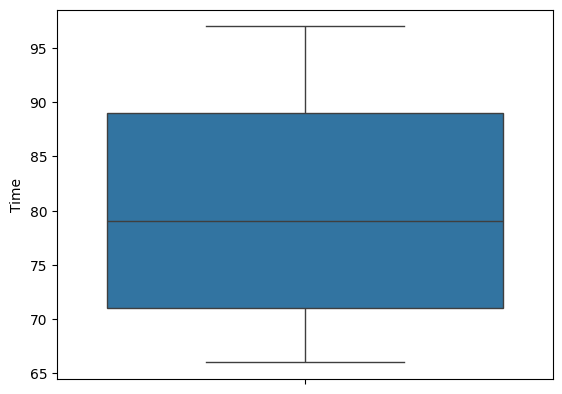

In [39]:
sns.boxplot(park_assign_1['Time'])
plt.show()


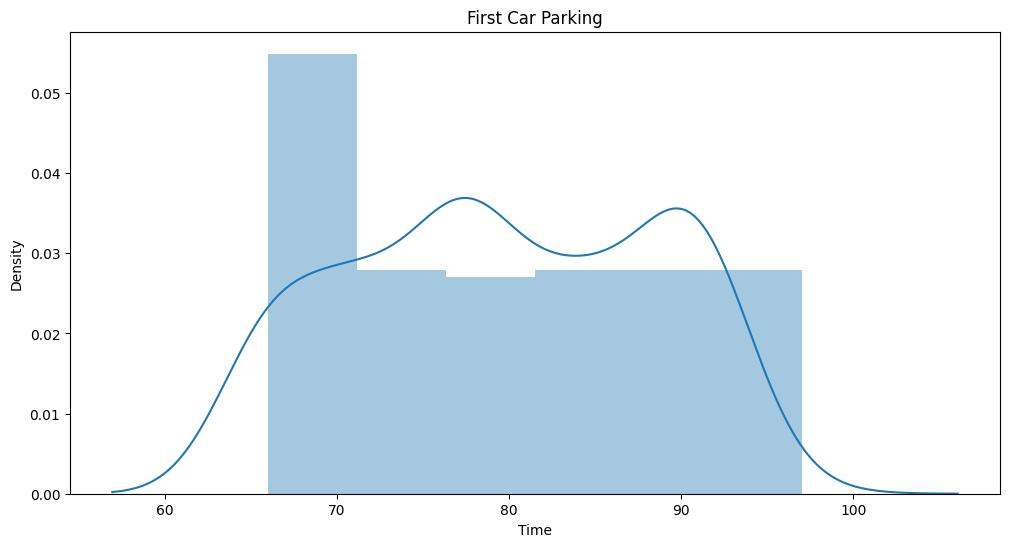

In [40]:
plt.figure(figsize=(12,6))
sns.distplot(park_assign_1['Time'])
plt.title("First Car Parking")
plt.show()

## Iteration 2


In [41]:
# Let's filter no 2 Parking for the flat data
flats_df_2 = new_flats_data[new_flats_data['Rank'] == 2]
flats_df_2 = flats_df_2.reset_index(drop='index')
print(flats_df_2.shape)
flats_df_2.head()

(208, 12)


,Time_To_Podium_1,Time_To_Podium_2,Time_To_Podium_3,Time_To_Podium_4,Time_To_Podium_5,Time_To_Podium_6,Time_To_Podium_7,Time_To_Podium_8,Time_To_Podium_9,Rank,unique_flat_no,key
0,26,24,22,20,18,16,14,12,10,2,2-C-1401,1
1,26,24,22,20,18,16,14,12,10,2,2-C-1402,1
2,26,24,22,20,18,16,14,12,10,2,2-C-1403,1
3,26,24,22,20,18,16,14,12,10,2,2-C-1404,1
4,28,26,24,22,20,18,16,14,12,2,2-C-1501,1


In [42]:
len(park_assign_1['Col'])

208

In [43]:
print(parking_data.shape)
parking_data.head()

(801, 2)


,Parking Slot,TotalTime
0,Podium_2-1,55
1,Podium_2-2,55
2,Podium_2-3,55
3,Podium_2-4,55
4,Podium_2-5,55


In [44]:
# Drop the assign car parking from the dataset

cols_to_drop_1 = park_assign_1['Col'].values    
print(len(cols_to_drop_1))

208


In [45]:
# Filter out columns that exist in parking_time_1
cols_to_drop_existing = []
for col in cols_to_drop_1:
    cols_to_drop_existing.append(parking_data.loc[col][0])

cols_to_drop_existing

['Podium_3-14',
 'Podium_3-13',
 'Podium_3-12',
 'Podium_3-11',
 'Podium_3-10',
 'Podium_3-9',
 'Podium_3-8',
 'Podium_3-7',
 'Podium_3-6',
 'Podium_3-5',
 'Podium_3-4',
 'Podium_3-3',
 'Podium_3-2',
 'Podium_3-1',
 'Podium_3-59',
 'Podium_2-74',
 'Podium_2-73',
 'Podium_2-72',
 'Podium_2-71',
 'Podium_2-70',
 'Podium_2-69',
 'Podium_2-68',
 'Podium_2-67',
 'Podium_2-66',
 'Podium_2-65',
 'Podium_2-64',
 'Podium_2-63',
 'Podium_2-62',
 'Podium_2-61',
 'Podium_2-60',
 'Podium_3-15',
 'Podium_2-59',
 'Podium_2-58',
 'Podium_2-57',
 'Podium_2-56',
 'Podium_2-55',
 'Podium_2-54',
 'Podium_2-53',
 'Podium_2-52',
 'Podium_2-51',
 'Podium_2-50',
 'Podium_2-49',
 'Podium_2-48',
 'Podium_2-47',
 'Podium_2-46',
 'Podium_2-45',
 'Podium_2-44',
 'Podium_2-43',
 'Podium_2-42',
 'Podium_2-41',
 'Podium_2-40',
 'Podium_2-39',
 'Podium_2-38',
 'Podium_2-37',
 'Podium_2-36',
 'Podium_2-35',
 'Podium_2-34',
 'Podium_2-33',
 'Podium_2-32',
 'Podium_2-31',
 'Podium_2-30',
 'Podium_2-29',
 'Podium_2-28',
 

In [46]:
# Dropping existing columns

parking_time_2 = parking_data_transpose.drop(cols_to_drop_existing,axis=1,errors='ignore')
print(parking_time_2.shape)
parking_time_2

(1, 595)


,Parking Slot,Podium_4-1,Podium_4-2,Podium_4-3,Podium_4-4,Podium_4-5,Podium_4-6,Podium_4-7,Podium_4-8,Podium_4-9,Podium_4-10,Podium_4-11,Podium_4-12,Podium_4-13,Podium_4-14,Podium_4-15,Podium_4-16,Podium_4-17,Podium_4-18,Podium_4-19,Podium_4-20,Podium_4-21,Podium_4-22,Podium_4-23,Podium_4-24,Podium_4-25,Podium_4-26,Podium_4-27,Podium_4-28,Podium_4-29,Podium_4-30,Podium_4-31,Podium_4-32,Podium_4-33,Podium_4-34,Podium_4-35,Podium_4-36,Podium_4-37,Podium_4-38,Podium_4-39,Podium_4-40,Podium_4-41,Podium_4-42,Podium_4-43,Podium_4-44,Podium_4-45,Podium_4-46,Podium_4-47,Podium_4-48,Podium_4-49,Podium_4-50,Podium_4-51,Podium_4-52,Podium_4-53,Podium_4-54,Podium_4-55,Podium_4-56,Podium_4-57,Podium_4-58,Podium_4-59,Podium_4-60,Podium_4-61,Podium_4-62,Podium_4-63,Podium_4-64,Podium_4-65,Podium_4-66,Podium_4-67,Podium_4-68,Podium_4-69,Podium_4-70,Podium_4-71,Podium_4-72,Podium_4-73,Podium_4-74,Podium_4-75,Podium_4-76,Podium_4-77,Podium_4-78,Podium_4-79,Podium_4-80,Podium_4-81,Podium_4-82,Podium_4-83,Podium_4-84,Podium_4-85,Podium_4-86,Podium_4-87,Podium_4-88,Podium_4-89,Podium_5-1,Podium_5-2,Podium_5-3,Podium_5-4,Podium_5-5,Podium_5-6,Podium_5-7,Podium_5-8,Podium_5-9,Podium_5-10,Podium_5-11,Podium_5-12,Podium_5-13,Podium_5-14,Podium_5-15,Podium_5-16,Podium_5-17,Podium_5-18,Podium_5-19,Podium_5-20,Podium_5-21,Podium_5-22,Podium_5-23,Podium_5-24,Podium_5-25,Podium_5-26,Podium_5-27,Podium_5-28,Podium_5-29,Podium_5-30,Podium_5-31,Podium_5-32,Podium_5-33,Podium_5-34,Podium_5-35,Podium_5-36,Podium_5-37,Podium_5-38,Podium_5-39,Podium_5-40,Podium_5-41,Podium_5-42,Podium_5-43,Podium_5-44,Podium_5-45,Podium_5-46,Podium_5-47,Podium_5-48,Podium_5-49,Podium_5-50,Podium_5-51,Podium_5-52,Podium_5-53,Podium_5-54,Podium_5-55,Podium_5-56,Podium_5-57,Podium_5-58,Podium_5-59,Podium_5-60,Podium_5-61,Podium_5-62,Podium_5-63,Podium_5-64,Podium_5-65,Podium_5-66,Podium_5-67,Podium_5-68,Podium_5-69,Podium_5-70,Podium_5-71,Podium_5-72,Podium_5-73,Podium_5-74,Podium_5-75,Podium_5-76,Podium_5-77,Podium_5-78,Podium_5-79,Podium_5-80,Podium_5-81,Podium_5-82,Podium_5-83,Podium_5-84,Podium_5-85,Podium_5-86,Podium_5-87,Podium_5-88,Podium_5-89,Podium_6-1,Podium_6-2,Podium_6-3,Podium_6-4,Podium_6-5,Podium_6-6,Podium_6-7,Podium_6-8,Podium_6-9,Podium_6-10,Podium_6-11,Podium_6-12,Podium_6-13,Podium_6-14,Podium_6-15,Podium_6-16,Podium_6-17,Podium_6-18,Podium_6-19,Podium_6-20,Podium_6-21,Podium_6-22,Podium_6-23,Podium_6-24,Podium_6-25,Podium_6-26,Podium_6-27,Podium_6-28,Podium_6-29,Podium_6-30,Podium_6-31,Podium_6-32,Podium_6-33,Podium_6-34,Podium_6-35,Podium_6-36,Podium_6-37,Podium_6-38,Podium_6-39,Podium_6-40,Podium_6-41,Podium_6-42,Podium_6-43,Podium_6-44,Podium_6-45,Podium_6-46,Podium_6-47,Podium_6-48,Podium_6-49,Podium_6-50,Podium_6-51,Podium_6-52,Podium_6-53,Podium_6-54,Podium_6-55,Podium_6-56,Podium_6-57,Podium_6-58,Podium_6-59,Podium_6-60,Podium_6-61,Podium_6-62,Podium_6-63,Podium_6-64,Podium_6-65,Podium_6-66,Podium_6-67,Podium_6-68,Podium_6-69,Podium_6-70,Podium_6-71,Podium_6-72,Podium_6-73,Podium_6-74,Podium_6-75,Podium_6-76,Podium_6-77,Podium_6-78,Podium_6-79,Podium_6-80,Podium_6-81,Podium_6-82,Podium_6-83,Podium_6-84,Podium_6-85,Podium_6-86,Podium_6-87,Podium_6-88,Podium_6-89,Podium_7-1,Podium_7-2,Podium_7-3,Podium_7-4,Podium_7-5,Podium_7-6,Podium_7-7,Podium_7-8,Podium_7-9,Podium_7-10,Podium_7-11,Podium_7-12,Podium_7-13,Podium_7-14,Podium_7-15,Podium_7-16,Podium_7-17,Podium_7-18,Podium_7-19,Podium_7-20,Podium_7-21,Podium_7-22,Podium_7-23,Podium_7-24,Podium_7-25,Podium_7-26,Podium_7-27,Podium_7-28,Podium_7-29,Podium_7-30,Podium_7-31,Podium_7-32,Podium_7-33,Podium_7-34,Podium_7-35,Podium_7-36,Podium_7-37,Podium_7-38,Podium_7-39,Podium_7-40,Podium_7-41,Podium_7-42,Podium_7-43,Podium_7-44,Podium_7-45,Podium_7-46,Podium_7-47,Podium_7-48,Podium_7-49,Podium_7-50,Podium_7-51,Podium_7-52,Podium_7-53,Podium_7-54,Podium_7-55,Podium_7-56,Podium_7-57,Podium_7-58,Podium_7-59,Podium_7-60,Podium_7-61,Podium_7-62,Podium_7-63,Podium_7-64,Podium_7-65,Podium_7-66,Podium_7-67,Podium_7-68,Po

In [47]:
parking_time_2 = parking_time_2.iloc[:,1:]
print(parking_time_2.shape)
parking_time_2

(1, 594)


,Podium_4-1,Podium_4-2,Podium_4-3,Podium_4-4,Podium_4-5,Podium_4-6,Podium_4-7,Podium_4-8,Podium_4-9,Podium_4-10,Podium_4-11,Podium_4-12,Podium_4-13,Podium_4-14,Podium_4-15,Podium_4-16,Podium_4-17,Podium_4-18,Podium_4-19,Podium_4-20,Podium_4-21,Podium_4-22,Podium_4-23,Podium_4-24,Podium_4-25,Podium_4-26,Podium_4-27,Podium_4-28,Podium_4-29,Podium_4-30,Podium_4-31,Podium_4-32,Podium_4-33,Podium_4-34,Podium_4-35,Podium_4-36,Podium_4-37,Podium_4-38,Podium_4-39,Podium_4-40,Podium_4-41,Podium_4-42,Podium_4-43,Podium_4-44,Podium_4-45,Podium_4-46,Podium_4-47,Podium_4-48,Podium_4-49,Podium_4-50,Podium_4-51,Podium_4-52,Podium_4-53,Podium_4-54,Podium_4-55,Podium_4-56,Podium_4-57,Podium_4-58,Podium_4-59,Podium_4-60,Podium_4-61,Podium_4-62,Podium_4-63,Podium_4-64,Podium_4-65,Podium_4-66,Podium_4-67,Podium_4-68,Podium_4-69,Podium_4-70,Podium_4-71,Podium_4-72,Podium_4-73,Podium_4-74,Podium_4-75,Podium_4-76,Podium_4-77,Podium_4-78,Podium_4-79,Podium_4-80,Podium_4-81,Podium_4-82,Podium_4-83,Podium_4-84,Podium_4-85,Podium_4-86,Podium_4-87,Podium_4-88,Podium_4-89,Podium_5-1,Podium_5-2,Podium_5-3,Podium_5-4,Podium_5-5,Podium_5-6,Podium_5-7,Podium_5-8,Podium_5-9,Podium_5-10,Podium_5-11,Podium_5-12,Podium_5-13,Podium_5-14,Podium_5-15,Podium_5-16,Podium_5-17,Podium_5-18,Podium_5-19,Podium_5-20,Podium_5-21,Podium_5-22,Podium_5-23,Podium_5-24,Podium_5-25,Podium_5-26,Podium_5-27,Podium_5-28,Podium_5-29,Podium_5-30,Podium_5-31,Podium_5-32,Podium_5-33,Podium_5-34,Podium_5-35,Podium_5-36,Podium_5-37,Podium_5-38,Podium_5-39,Podium_5-40,Podium_5-41,Podium_5-42,Podium_5-43,Podium_5-44,Podium_5-45,Podium_5-46,Podium_5-47,Podium_5-48,Podium_5-49,Podium_5-50,Podium_5-51,Podium_5-52,Podium_5-53,Podium_5-54,Podium_5-55,Podium_5-56,Podium_5-57,Podium_5-58,Podium_5-59,Podium_5-60,Podium_5-61,Podium_5-62,Podium_5-63,Podium_5-64,Podium_5-65,Podium_5-66,Podium_5-67,Podium_5-68,Podium_5-69,Podium_5-70,Podium_5-71,Podium_5-72,Podium_5-73,Podium_5-74,Podium_5-75,Podium_5-76,Podium_5-77,Podium_5-78,Podium_5-79,Podium_5-80,Podium_5-81,Podium_5-82,Podium_5-83,Podium_5-84,Podium_5-85,Podium_5-86,Podium_5-87,Podium_5-88,Podium_5-89,Podium_6-1,Podium_6-2,Podium_6-3,Podium_6-4,Podium_6-5,Podium_6-6,Podium_6-7,Podium_6-8,Podium_6-9,Podium_6-10,Podium_6-11,Podium_6-12,Podium_6-13,Podium_6-14,Podium_6-15,Podium_6-16,Podium_6-17,Podium_6-18,Podium_6-19,Podium_6-20,Podium_6-21,Podium_6-22,Podium_6-23,Podium_6-24,Podium_6-25,Podium_6-26,Podium_6-27,Podium_6-28,Podium_6-29,Podium_6-30,Podium_6-31,Podium_6-32,Podium_6-33,Podium_6-34,Podium_6-35,Podium_6-36,Podium_6-37,Podium_6-38,Podium_6-39,Podium_6-40,Podium_6-41,Podium_6-42,Podium_6-43,Podium_6-44,Podium_6-45,Podium_6-46,Podium_6-47,Podium_6-48,Podium_6-49,Podium_6-50,Podium_6-51,Podium_6-52,Podium_6-53,Podium_6-54,Podium_6-55,Podium_6-56,Podium_6-57,Podium_6-58,Podium_6-59,Podium_6-60,Podium_6-61,Podium_6-62,Podium_6-63,Podium_6-64,Podium_6-65,Podium_6-66,Podium_6-67,Podium_6-68,Podium_6-69,Podium_6-70,Podium_6-71,Podium_6-72,Podium_6-73,Podium_6-74,Podium_6-75,Podium_6-76,Podium_6-77,Podium_6-78,Podium_6-79,Podium_6-80,Podium_6-81,Podium_6-82,Podium_6-83,Podium_6-84,Podium_6-85,Podium_6-86,Podium_6-87,Podium_6-88,Podium_6-89,Podium_7-1,Podium_7-2,Podium_7-3,Podium_7-4,Podium_7-5,Podium_7-6,Podium_7-7,Podium_7-8,Podium_7-9,Podium_7-10,Podium_7-11,Podium_7-12,Podium_7-13,Podium_7-14,Podium_7-15,Podium_7-16,Podium_7-17,Podium_7-18,Podium_7-19,Podium_7-20,Podium_7-21,Podium_7-22,Podium_7-23,Podium_7-24,Podium_7-25,Podium_7-26,Podium_7-27,Podium_7-28,Podium_7-29,Podium_7-30,Podium_7-31,Podium_7-32,Podium_7-33,Podium_7-34,Podium_7-35,Podium_7-36,Podium_7-37,Podium_7-38,Podium_7-39,Podium_7-40,Podium_7-41,Podium_7-42,Podium_7-43,Podium_7-44,Podium_7-45,Podium_7-46,Podium_7-47,Podium_7-48,Podium_7-49,Podium_7-50,Podium_7-51,Podium_7-52,Podium_7-53,Podium_7-54,Podium_7-55,Podium_7-56,Podium_7-57,Podium_7-58,Podium_7-59,Podium_7-60,Podium_7-61,Podium_7-62,Podium_7-63,Podium_7-64,Podium_7-65,Podium_7-66,Podium_7-67,Podium_7-68,Podium_7-69,Pod

In [48]:
flats_df_2.shape

(208, 12)

In [49]:
final_df_iter_2 = pd.merge(flats_df_2,parking_time_2,on='key',how='outer')
print(final_df_iter_2.shape)

final_df_iter_2.head()

(208, 605)


,Time_To_Podium_1,Time_To_Podium_2,Time_To_Podium_3,Time_To_Podium_4,Time_To_Podium_5,Time_To_Podium_6,Time_To_Podium_7,Time_To_Podium_8,Time_To_Podium_9,Rank,unique_flat_no,key,Podium_4-1,Podium_4-2,Podium_4-3,Podium_4-4,Podium_4-5,Podium_4-6,Podium_4-7,Podium_4-8,Podium_4-9,Podium_4-10,Podium_4-11,Podium_4-12,Podium_4-13,Podium_4-14,Podium_4-15,Podium_4-16,Podium_4-17,Podium_4-18,Podium_4-19,Podium_4-20,Podium_4-21,Podium_4-22,Podium_4-23,Podium_4-24,Podium_4-25,Podium_4-26,Podium_4-27,Podium_4-28,Podium_4-29,Podium_4-30,Podium_4-31,Podium_4-32,Podium_4-33,Podium_4-34,Podium_4-35,Podium_4-36,Podium_4-37,Podium_4-38,Podium_4-39,Podium_4-40,Podium_4-41,Podium_4-42,Podium_4-43,Podium_4-44,Podium_4-45,Podium_4-46,Podium_4-47,Podium_4-48,Podium_4-49,Podium_4-50,Podium_4-51,Podium_4-52,Podium_4-53,Podium_4-54,Podium_4-55,Podium_4-56,Podium_4-57,Podium_4-58,Podium_4-59,Podium_4-60,Podium_4-61,Podium_4-62,Podium_4-63,Podium_4-64,Podium_4-65,Podium_4-66,Podium_4-67,Podium_4-68,Podium_4-69,Podium_4-70,Podium_4-71,Podium_4-72,Podium_4-73,Podium_4-74,Podium_4-75,Podium_4-76,Podium_4-77,Podium_4-78,Podium_4-79,Podium_4-80,Podium_4-81,Podium_4-82,Podium_4-83,Podium_4-84,Podium_4-85,Podium_4-86,Podium_4-87,Podium_4-88,Podium_4-89,Podium_5-1,Podium_5-2,Podium_5-3,Podium_5-4,Podium_5-5,Podium_5-6,Podium_5-7,Podium_5-8,Podium_5-9,Podium_5-10,Podium_5-11,Podium_5-12,Podium_5-13,Podium_5-14,Podium_5-15,Podium_5-16,Podium_5-17,Podium_5-18,Podium_5-19,Podium_5-20,Podium_5-21,Podium_5-22,Podium_5-23,Podium_5-24,Podium_5-25,Podium_5-26,Podium_5-27,Podium_5-28,Podium_5-29,Podium_5-30,Podium_5-31,Podium_5-32,Podium_5-33,Podium_5-34,Podium_5-35,Podium_5-36,Podium_5-37,Podium_5-38,Podium_5-39,Podium_5-40,Podium_5-41,Podium_5-42,Podium_5-43,Podium_5-44,Podium_5-45,Podium_5-46,Podium_5-47,Podium_5-48,Podium_5-49,Podium_5-50,Podium_5-51,Podium_5-52,Podium_5-53,Podium_5-54,Podium_5-55,Podium_5-56,Podium_5-57,Podium_5-58,Podium_5-59,Podium_5-60,Podium_5-61,Podium_5-62,Podium_5-63,Podium_5-64,Podium_5-65,Podium_5-66,Podium_5-67,Podium_5-68,Podium_5-69,Podium_5-70,Podium_5-71,Podium_5-72,Podium_5-73,Podium_5-74,Podium_5-75,Podium_5-76,Podium_5-77,Podium_5-78,Podium_5-79,Podium_5-80,Podium_5-81,Podium_5-82,Podium_5-83,Podium_5-84,Podium_5-85,Podium_5-86,Podium_5-87,Podium_5-88,Podium_5-89,Podium_6-1,Podium_6-2,Podium_6-3,Podium_6-4,Podium_6-5,Podium_6-6,Podium_6-7,Podium_6-8,Podium_6-9,Podium_6-10,Podium_6-11,Podium_6-12,Podium_6-13,Podium_6-14,Podium_6-15,Podium_6-16,Podium_6-17,Podium_6-18,Podium_6-19,Podium_6-20,Podium_6-21,Podium_6-22,Podium_6-23,Podium_6-24,Podium_6-25,Podium_6-26,Podium_6-27,Podium_6-28,Podium_6-29,Podium_6-30,Podium_6-31,Podium_6-32,Podium_6-33,Podium_6-34,Podium_6-35,Podium_6-36,Podium_6-37,Podium_6-38,Podium_6-39,Podium_6-40,Podium_6-41,Podium_6-42,Podium_6-43,Podium_6-44,Podium_6-45,Podium_6-46,Podium_6-47,Podium_6-48,Podium_6-49,Podium_6-50,Podium_6-51,Podium_6-52,Podium_6-53,Podium_6-54,Podium_6-55,Podium_6-56,Podium_6-57,Podium_6-58,Podium_6-59,Podium_6-60,Podium_6-61,Podium_6-62,Podium_6-63,Podium_6-64,Podium_6-65,Podium_6-66,Podium_6-67,Podium_6-68,Podium_6-69,Podium_6-70,Podium_6-71,Podium_6-72,Podium_6-73,Podium_6-74,Podium_6-75,Podium_6-76,Podium_6-77,Podium_6-78,Podium_6-79,Podium_6-80,Podium_6-81,Podium_6-82,Podium_6-83,Podium_6-84,Podium_6-85,Podium_6-86,Podium_6-87,Podium_6-88,Podium_6-89,Podium_7-1,Podium_7-2,Podium_7-3,Podium_7-4,Podium_7-5,Podium_7-6,Podium_7-7,Podium_7-8,Podium_7-9,Podium_7-10,Podium_7-11,Podium_7-12,Podium_7-13,Podium_7-14,Podium_7-15,Podium_7-16,Podium_7-17,Podium_7-18,Podium_7-19,Podium_7-20,Podium_7-21,Podium_7-22,Podium_7-23,Podium_7-24,Podium_7-25,Podium_7-26,Podium_7-27,Podium_7-28,Podium_7-29,Podium_7-30,Podium_7-31,Podium_7-32,Podium_7-33,Podium_7-34,Podium_7-35,Podium_7-36,Podium_7-37,Podium_7-38,Podium_7-39,Podium_7-40,Podium_7-41,Podium_7-42,Podium_7-43,Podium_7-44,Podium_7-45,Podium_7-46,Podium_7-47,Podium_7-48,Podium_7-49,Podium_7-50,Podium_7-51,Podium_7-52,Podium_7-53,Podium_7-54,Podium

In [50]:
final_df_iter_2 = final_df_iter_2.drop(columns=['key','Rank'])
final_df_iter_2.head()

,Time_To_Podium_1,Time_To_Podium_2,Time_To_Podium_3,Time_To_Podium_4,Time_To_Podium_5,Time_To_Podium_6,Time_To_Podium_7,Time_To_Podium_8,Time_To_Podium_9,unique_flat_no,Podium_4-1,Podium_4-2,Podium_4-3,Podium_4-4,Podium_4-5,Podium_4-6,Podium_4-7,Podium_4-8,Podium_4-9,Podium_4-10,Podium_4-11,Podium_4-12,Podium_4-13,Podium_4-14,Podium_4-15,Podium_4-16,Podium_4-17,Podium_4-18,Podium_4-19,Podium_4-20,Podium_4-21,Podium_4-22,Podium_4-23,Podium_4-24,Podium_4-25,Podium_4-26,Podium_4-27,Podium_4-28,Podium_4-29,Podium_4-30,Podium_4-31,Podium_4-32,Podium_4-33,Podium_4-34,Podium_4-35,Podium_4-36,Podium_4-37,Podium_4-38,Podium_4-39,Podium_4-40,Podium_4-41,Podium_4-42,Podium_4-43,Podium_4-44,Podium_4-45,Podium_4-46,Podium_4-47,Podium_4-48,Podium_4-49,Podium_4-50,Podium_4-51,Podium_4-52,Podium_4-53,Podium_4-54,Podium_4-55,Podium_4-56,Podium_4-57,Podium_4-58,Podium_4-59,Podium_4-60,Podium_4-61,Podium_4-62,Podium_4-63,Podium_4-64,Podium_4-65,Podium_4-66,Podium_4-67,Podium_4-68,Podium_4-69,Podium_4-70,Podium_4-71,Podium_4-72,Podium_4-73,Podium_4-74,Podium_4-75,Podium_4-76,Podium_4-77,Podium_4-78,Podium_4-79,Podium_4-80,Podium_4-81,Podium_4-82,Podium_4-83,Podium_4-84,Podium_4-85,Podium_4-86,Podium_4-87,Podium_4-88,Podium_4-89,Podium_5-1,Podium_5-2,Podium_5-3,Podium_5-4,Podium_5-5,Podium_5-6,Podium_5-7,Podium_5-8,Podium_5-9,Podium_5-10,Podium_5-11,Podium_5-12,Podium_5-13,Podium_5-14,Podium_5-15,Podium_5-16,Podium_5-17,Podium_5-18,Podium_5-19,Podium_5-20,Podium_5-21,Podium_5-22,Podium_5-23,Podium_5-24,Podium_5-25,Podium_5-26,Podium_5-27,Podium_5-28,Podium_5-29,Podium_5-30,Podium_5-31,Podium_5-32,Podium_5-33,Podium_5-34,Podium_5-35,Podium_5-36,Podium_5-37,Podium_5-38,Podium_5-39,Podium_5-40,Podium_5-41,Podium_5-42,Podium_5-43,Podium_5-44,Podium_5-45,Podium_5-46,Podium_5-47,Podium_5-48,Podium_5-49,Podium_5-50,Podium_5-51,Podium_5-52,Podium_5-53,Podium_5-54,Podium_5-55,Podium_5-56,Podium_5-57,Podium_5-58,Podium_5-59,Podium_5-60,Podium_5-61,Podium_5-62,Podium_5-63,Podium_5-64,Podium_5-65,Podium_5-66,Podium_5-67,Podium_5-68,Podium_5-69,Podium_5-70,Podium_5-71,Podium_5-72,Podium_5-73,Podium_5-74,Podium_5-75,Podium_5-76,Podium_5-77,Podium_5-78,Podium_5-79,Podium_5-80,Podium_5-81,Podium_5-82,Podium_5-83,Podium_5-84,Podium_5-85,Podium_5-86,Podium_5-87,Podium_5-88,Podium_5-89,Podium_6-1,Podium_6-2,Podium_6-3,Podium_6-4,Podium_6-5,Podium_6-6,Podium_6-7,Podium_6-8,Podium_6-9,Podium_6-10,Podium_6-11,Podium_6-12,Podium_6-13,Podium_6-14,Podium_6-15,Podium_6-16,Podium_6-17,Podium_6-18,Podium_6-19,Podium_6-20,Podium_6-21,Podium_6-22,Podium_6-23,Podium_6-24,Podium_6-25,Podium_6-26,Podium_6-27,Podium_6-28,Podium_6-29,Podium_6-30,Podium_6-31,Podium_6-32,Podium_6-33,Podium_6-34,Podium_6-35,Podium_6-36,Podium_6-37,Podium_6-38,Podium_6-39,Podium_6-40,Podium_6-41,Podium_6-42,Podium_6-43,Podium_6-44,Podium_6-45,Podium_6-46,Podium_6-47,Podium_6-48,Podium_6-49,Podium_6-50,Podium_6-51,Podium_6-52,Podium_6-53,Podium_6-54,Podium_6-55,Podium_6-56,Podium_6-57,Podium_6-58,Podium_6-59,Podium_6-60,Podium_6-61,Podium_6-62,Podium_6-63,Podium_6-64,Podium_6-65,Podium_6-66,Podium_6-67,Podium_6-68,Podium_6-69,Podium_6-70,Podium_6-71,Podium_6-72,Podium_6-73,Podium_6-74,Podium_6-75,Podium_6-76,Podium_6-77,Podium_6-78,Podium_6-79,Podium_6-80,Podium_6-81,Podium_6-82,Podium_6-83,Podium_6-84,Podium_6-85,Podium_6-86,Podium_6-87,Podium_6-88,Podium_6-89,Podium_7-1,Podium_7-2,Podium_7-3,Podium_7-4,Podium_7-5,Podium_7-6,Podium_7-7,Podium_7-8,Podium_7-9,Podium_7-10,Podium_7-11,Podium_7-12,Podium_7-13,Podium_7-14,Podium_7-15,Podium_7-16,Podium_7-17,Podium_7-18,Podium_7-19,Podium_7-20,Podium_7-21,Podium_7-22,Podium_7-23,Podium_7-24,Podium_7-25,Podium_7-26,Podium_7-27,Podium_7-28,Podium_7-29,Podium_7-30,Podium_7-31,Podium_7-32,Podium_7-33,Podium_7-34,Podium_7-35,Podium_7-36,Podium_7-37,Podium_7-38,Podium_7-39,Podium_7-40,Podium_7-41,Podium_7-42,Podium_7-43,Podium_7-44,Podium_7-45,Podium_7-46,Podium_7-47,Podium_7-48,Podium_7-49,Podium_7-50,Podium_7-51,Podium_7-52,Podium_7-53,Podium_7-54,Podium_7-55,Pod

In [51]:
podium_time_2 = final_df_iter_2.iloc[:,:10]
print(podium_time_2.shape)
podium_time_2.head()

(208, 10)


,Time_To_Podium_1,Time_To_Podium_2,Time_To_Podium_3,Time_To_Podium_4,Time_To_Podium_5,Time_To_Podium_6,Time_To_Podium_7,Time_To_Podium_8,Time_To_Podium_9,unique_flat_no
0,26,24,22,20,18,16,14,12,10,2-C-1401
1,26,24,22,20,18,16,14,12,10,2-C-1402
2,26,24,22,20,18,16,14,12,10,2-C-1403
3,26,24,22,20,18,16,14,12,10,2-C-1404
4,28,26,24,22,20,18,16,14,12,2-C-1501


In [52]:
parking_time_2 = final_df_iter_2.iloc[:,10:]
print(parking_time_2.shape)
parking_time_2.head()

(208, 593)


,Podium_4-1,Podium_4-2,Podium_4-3,Podium_4-4,Podium_4-5,Podium_4-6,Podium_4-7,Podium_4-8,Podium_4-9,Podium_4-10,Podium_4-11,Podium_4-12,Podium_4-13,Podium_4-14,Podium_4-15,Podium_4-16,Podium_4-17,Podium_4-18,Podium_4-19,Podium_4-20,Podium_4-21,Podium_4-22,Podium_4-23,Podium_4-24,Podium_4-25,Podium_4-26,Podium_4-27,Podium_4-28,Podium_4-29,Podium_4-30,Podium_4-31,Podium_4-32,Podium_4-33,Podium_4-34,Podium_4-35,Podium_4-36,Podium_4-37,Podium_4-38,Podium_4-39,Podium_4-40,Podium_4-41,Podium_4-42,Podium_4-43,Podium_4-44,Podium_4-45,Podium_4-46,Podium_4-47,Podium_4-48,Podium_4-49,Podium_4-50,Podium_4-51,Podium_4-52,Podium_4-53,Podium_4-54,Podium_4-55,Podium_4-56,Podium_4-57,Podium_4-58,Podium_4-59,Podium_4-60,Podium_4-61,Podium_4-62,Podium_4-63,Podium_4-64,Podium_4-65,Podium_4-66,Podium_4-67,Podium_4-68,Podium_4-69,Podium_4-70,Podium_4-71,Podium_4-72,Podium_4-73,Podium_4-74,Podium_4-75,Podium_4-76,Podium_4-77,Podium_4-78,Podium_4-79,Podium_4-80,Podium_4-81,Podium_4-82,Podium_4-83,Podium_4-84,Podium_4-85,Podium_4-86,Podium_4-87,Podium_4-88,Podium_4-89,Podium_5-1,Podium_5-2,Podium_5-3,Podium_5-4,Podium_5-5,Podium_5-6,Podium_5-7,Podium_5-8,Podium_5-9,Podium_5-10,Podium_5-11,Podium_5-12,Podium_5-13,Podium_5-14,Podium_5-15,Podium_5-16,Podium_5-17,Podium_5-18,Podium_5-19,Podium_5-20,Podium_5-21,Podium_5-22,Podium_5-23,Podium_5-24,Podium_5-25,Podium_5-26,Podium_5-27,Podium_5-28,Podium_5-29,Podium_5-30,Podium_5-31,Podium_5-32,Podium_5-33,Podium_5-34,Podium_5-35,Podium_5-36,Podium_5-37,Podium_5-38,Podium_5-39,Podium_5-40,Podium_5-41,Podium_5-42,Podium_5-43,Podium_5-44,Podium_5-45,Podium_5-46,Podium_5-47,Podium_5-48,Podium_5-49,Podium_5-50,Podium_5-51,Podium_5-52,Podium_5-53,Podium_5-54,Podium_5-55,Podium_5-56,Podium_5-57,Podium_5-58,Podium_5-59,Podium_5-60,Podium_5-61,Podium_5-62,Podium_5-63,Podium_5-64,Podium_5-65,Podium_5-66,Podium_5-67,Podium_5-68,Podium_5-69,Podium_5-70,Podium_5-71,Podium_5-72,Podium_5-73,Podium_5-74,Podium_5-75,Podium_5-76,Podium_5-77,Podium_5-78,Podium_5-79,Podium_5-80,Podium_5-81,Podium_5-82,Podium_5-83,Podium_5-84,Podium_5-85,Podium_5-86,Podium_5-87,Podium_5-88,Podium_5-89,Podium_6-1,Podium_6-2,Podium_6-3,Podium_6-4,Podium_6-5,Podium_6-6,Podium_6-7,Podium_6-8,Podium_6-9,Podium_6-10,Podium_6-11,Podium_6-12,Podium_6-13,Podium_6-14,Podium_6-15,Podium_6-16,Podium_6-17,Podium_6-18,Podium_6-19,Podium_6-20,Podium_6-21,Podium_6-22,Podium_6-23,Podium_6-24,Podium_6-25,Podium_6-26,Podium_6-27,Podium_6-28,Podium_6-29,Podium_6-30,Podium_6-31,Podium_6-32,Podium_6-33,Podium_6-34,Podium_6-35,Podium_6-36,Podium_6-37,Podium_6-38,Podium_6-39,Podium_6-40,Podium_6-41,Podium_6-42,Podium_6-43,Podium_6-44,Podium_6-45,Podium_6-46,Podium_6-47,Podium_6-48,Podium_6-49,Podium_6-50,Podium_6-51,Podium_6-52,Podium_6-53,Podium_6-54,Podium_6-55,Podium_6-56,Podium_6-57,Podium_6-58,Podium_6-59,Podium_6-60,Podium_6-61,Podium_6-62,Podium_6-63,Podium_6-64,Podium_6-65,Podium_6-66,Podium_6-67,Podium_6-68,Podium_6-69,Podium_6-70,Podium_6-71,Podium_6-72,Podium_6-73,Podium_6-74,Podium_6-75,Podium_6-76,Podium_6-77,Podium_6-78,Podium_6-79,Podium_6-80,Podium_6-81,Podium_6-82,Podium_6-83,Podium_6-84,Podium_6-85,Podium_6-86,Podium_6-87,Podium_6-88,Podium_6-89,Podium_7-1,Podium_7-2,Podium_7-3,Podium_7-4,Podium_7-5,Podium_7-6,Podium_7-7,Podium_7-8,Podium_7-9,Podium_7-10,Podium_7-11,Podium_7-12,Podium_7-13,Podium_7-14,Podium_7-15,Podium_7-16,Podium_7-17,Podium_7-18,Podium_7-19,Podium_7-20,Podium_7-21,Podium_7-22,Podium_7-23,Podium_7-24,Podium_7-25,Podium_7-26,Podium_7-27,Podium_7-28,Podium_7-29,Podium_7-30,Podium_7-31,Podium_7-32,Podium_7-33,Podium_7-34,Podium_7-35,Podium_7-36,Podium_7-37,Podium_7-38,Podium_7-39,Podium_7-40,Podium_7-41,Podium_7-42,Podium_7-43,Podium_7-44,Podium_7-45,Podium_7-46,Podium_7-47,Podium_7-48,Podium_7-49,Podium_7-50,Podium_7-51,Podium_7-52,Podium_7-53,Podium_7-54,Podium_7-55,Podium_7-56,Podium_7-57,Podium_7-58,Podium_7-59,Podium_7-60,Podium_7-61,Podium_7-62,Podium_7-63,Podium_7-64,Podium_7-65,Podium_7-66,Podium_7-67,Podium_7-68,Podium_7-69,Pod

In [53]:
print(parking_time_2.shape)
parking_time_2.info()

(208, 593)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Columns: 593 entries, Podium_4-1 to Podium_9-89
dtypes: object(593)
memory usage: 963.8+ KB


In [54]:
for col in podium_time_2.columns:
    #print(col[-8:])
    for j in parking_time_2.columns:
        if col[-8:] == j[:8]:
            parking_time_2[j] += podium_time_2[col]
        else:
            pass
parking_time_2.head()

,Podium_4-1,Podium_4-2,Podium_4-3,Podium_4-4,Podium_4-5,Podium_4-6,Podium_4-7,Podium_4-8,Podium_4-9,Podium_4-10,Podium_4-11,Podium_4-12,Podium_4-13,Podium_4-14,Podium_4-15,Podium_4-16,Podium_4-17,Podium_4-18,Podium_4-19,Podium_4-20,Podium_4-21,Podium_4-22,Podium_4-23,Podium_4-24,Podium_4-25,Podium_4-26,Podium_4-27,Podium_4-28,Podium_4-29,Podium_4-30,Podium_4-31,Podium_4-32,Podium_4-33,Podium_4-34,Podium_4-35,Podium_4-36,Podium_4-37,Podium_4-38,Podium_4-39,Podium_4-40,Podium_4-41,Podium_4-42,Podium_4-43,Podium_4-44,Podium_4-45,Podium_4-46,Podium_4-47,Podium_4-48,Podium_4-49,Podium_4-50,Podium_4-51,Podium_4-52,Podium_4-53,Podium_4-54,Podium_4-55,Podium_4-56,Podium_4-57,Podium_4-58,Podium_4-59,Podium_4-60,Podium_4-61,Podium_4-62,Podium_4-63,Podium_4-64,Podium_4-65,Podium_4-66,Podium_4-67,Podium_4-68,Podium_4-69,Podium_4-70,Podium_4-71,Podium_4-72,Podium_4-73,Podium_4-74,Podium_4-75,Podium_4-76,Podium_4-77,Podium_4-78,Podium_4-79,Podium_4-80,Podium_4-81,Podium_4-82,Podium_4-83,Podium_4-84,Podium_4-85,Podium_4-86,Podium_4-87,Podium_4-88,Podium_4-89,Podium_5-1,Podium_5-2,Podium_5-3,Podium_5-4,Podium_5-5,Podium_5-6,Podium_5-7,Podium_5-8,Podium_5-9,Podium_5-10,Podium_5-11,Podium_5-12,Podium_5-13,Podium_5-14,Podium_5-15,Podium_5-16,Podium_5-17,Podium_5-18,Podium_5-19,Podium_5-20,Podium_5-21,Podium_5-22,Podium_5-23,Podium_5-24,Podium_5-25,Podium_5-26,Podium_5-27,Podium_5-28,Podium_5-29,Podium_5-30,Podium_5-31,Podium_5-32,Podium_5-33,Podium_5-34,Podium_5-35,Podium_5-36,Podium_5-37,Podium_5-38,Podium_5-39,Podium_5-40,Podium_5-41,Podium_5-42,Podium_5-43,Podium_5-44,Podium_5-45,Podium_5-46,Podium_5-47,Podium_5-48,Podium_5-49,Podium_5-50,Podium_5-51,Podium_5-52,Podium_5-53,Podium_5-54,Podium_5-55,Podium_5-56,Podium_5-57,Podium_5-58,Podium_5-59,Podium_5-60,Podium_5-61,Podium_5-62,Podium_5-63,Podium_5-64,Podium_5-65,Podium_5-66,Podium_5-67,Podium_5-68,Podium_5-69,Podium_5-70,Podium_5-71,Podium_5-72,Podium_5-73,Podium_5-74,Podium_5-75,Podium_5-76,Podium_5-77,Podium_5-78,Podium_5-79,Podium_5-80,Podium_5-81,Podium_5-82,Podium_5-83,Podium_5-84,Podium_5-85,Podium_5-86,Podium_5-87,Podium_5-88,Podium_5-89,Podium_6-1,Podium_6-2,Podium_6-3,Podium_6-4,Podium_6-5,Podium_6-6,Podium_6-7,Podium_6-8,Podium_6-9,Podium_6-10,Podium_6-11,Podium_6-12,Podium_6-13,Podium_6-14,Podium_6-15,Podium_6-16,Podium_6-17,Podium_6-18,Podium_6-19,Podium_6-20,Podium_6-21,Podium_6-22,Podium_6-23,Podium_6-24,Podium_6-25,Podium_6-26,Podium_6-27,Podium_6-28,Podium_6-29,Podium_6-30,Podium_6-31,Podium_6-32,Podium_6-33,Podium_6-34,Podium_6-35,Podium_6-36,Podium_6-37,Podium_6-38,Podium_6-39,Podium_6-40,Podium_6-41,Podium_6-42,Podium_6-43,Podium_6-44,Podium_6-45,Podium_6-46,Podium_6-47,Podium_6-48,Podium_6-49,Podium_6-50,Podium_6-51,Podium_6-52,Podium_6-53,Podium_6-54,Podium_6-55,Podium_6-56,Podium_6-57,Podium_6-58,Podium_6-59,Podium_6-60,Podium_6-61,Podium_6-62,Podium_6-63,Podium_6-64,Podium_6-65,Podium_6-66,Podium_6-67,Podium_6-68,Podium_6-69,Podium_6-70,Podium_6-71,Podium_6-72,Podium_6-73,Podium_6-74,Podium_6-75,Podium_6-76,Podium_6-77,Podium_6-78,Podium_6-79,Podium_6-80,Podium_6-81,Podium_6-82,Podium_6-83,Podium_6-84,Podium_6-85,Podium_6-86,Podium_6-87,Podium_6-88,Podium_6-89,Podium_7-1,Podium_7-2,Podium_7-3,Podium_7-4,Podium_7-5,Podium_7-6,Podium_7-7,Podium_7-8,Podium_7-9,Podium_7-10,Podium_7-11,Podium_7-12,Podium_7-13,Podium_7-14,Podium_7-15,Podium_7-16,Podium_7-17,Podium_7-18,Podium_7-19,Podium_7-20,Podium_7-21,Podium_7-22,Podium_7-23,Podium_7-24,Podium_7-25,Podium_7-26,Podium_7-27,Podium_7-28,Podium_7-29,Podium_7-30,Podium_7-31,Podium_7-32,Podium_7-33,Podium_7-34,Podium_7-35,Podium_7-36,Podium_7-37,Podium_7-38,Podium_7-39,Podium_7-40,Podium_7-41,Podium_7-42,Podium_7-43,Podium_7-44,Podium_7-45,Podium_7-46,Podium_7-47,Podium_7-48,Podium_7-49,Podium_7-50,Podium_7-51,Podium_7-52,Podium_7-53,Podium_7-54,Podium_7-55,Podium_7-56,Podium_7-57,Podium_7-58,Podium_7-59,Podium_7-60,Podium_7-61,Podium_7-62,Podium_7-63,Podium_7-64,Podium_7-65,Podium_7-66,Podium_7-67,Podium_7-68,Podium_7-69,Pod

In [55]:
parking_time_2.tail()

,Podium_4-1,Podium_4-2,Podium_4-3,Podium_4-4,Podium_4-5,Podium_4-6,Podium_4-7,Podium_4-8,Podium_4-9,Podium_4-10,Podium_4-11,Podium_4-12,Podium_4-13,Podium_4-14,Podium_4-15,Podium_4-16,Podium_4-17,Podium_4-18,Podium_4-19,Podium_4-20,Podium_4-21,Podium_4-22,Podium_4-23,Podium_4-24,Podium_4-25,Podium_4-26,Podium_4-27,Podium_4-28,Podium_4-29,Podium_4-30,Podium_4-31,Podium_4-32,Podium_4-33,Podium_4-34,Podium_4-35,Podium_4-36,Podium_4-37,Podium_4-38,Podium_4-39,Podium_4-40,Podium_4-41,Podium_4-42,Podium_4-43,Podium_4-44,Podium_4-45,Podium_4-46,Podium_4-47,Podium_4-48,Podium_4-49,Podium_4-50,Podium_4-51,Podium_4-52,Podium_4-53,Podium_4-54,Podium_4-55,Podium_4-56,Podium_4-57,Podium_4-58,Podium_4-59,Podium_4-60,Podium_4-61,Podium_4-62,Podium_4-63,Podium_4-64,Podium_4-65,Podium_4-66,Podium_4-67,Podium_4-68,Podium_4-69,Podium_4-70,Podium_4-71,Podium_4-72,Podium_4-73,Podium_4-74,Podium_4-75,Podium_4-76,Podium_4-77,Podium_4-78,Podium_4-79,Podium_4-80,Podium_4-81,Podium_4-82,Podium_4-83,Podium_4-84,Podium_4-85,Podium_4-86,Podium_4-87,Podium_4-88,Podium_4-89,Podium_5-1,Podium_5-2,Podium_5-3,Podium_5-4,Podium_5-5,Podium_5-6,Podium_5-7,Podium_5-8,Podium_5-9,Podium_5-10,Podium_5-11,Podium_5-12,Podium_5-13,Podium_5-14,Podium_5-15,Podium_5-16,Podium_5-17,Podium_5-18,Podium_5-19,Podium_5-20,Podium_5-21,Podium_5-22,Podium_5-23,Podium_5-24,Podium_5-25,Podium_5-26,Podium_5-27,Podium_5-28,Podium_5-29,Podium_5-30,Podium_5-31,Podium_5-32,Podium_5-33,Podium_5-34,Podium_5-35,Podium_5-36,Podium_5-37,Podium_5-38,Podium_5-39,Podium_5-40,Podium_5-41,Podium_5-42,Podium_5-43,Podium_5-44,Podium_5-45,Podium_5-46,Podium_5-47,Podium_5-48,Podium_5-49,Podium_5-50,Podium_5-51,Podium_5-52,Podium_5-53,Podium_5-54,Podium_5-55,Podium_5-56,Podium_5-57,Podium_5-58,Podium_5-59,Podium_5-60,Podium_5-61,Podium_5-62,Podium_5-63,Podium_5-64,Podium_5-65,Podium_5-66,Podium_5-67,Podium_5-68,Podium_5-69,Podium_5-70,Podium_5-71,Podium_5-72,Podium_5-73,Podium_5-74,Podium_5-75,Podium_5-76,Podium_5-77,Podium_5-78,Podium_5-79,Podium_5-80,Podium_5-81,Podium_5-82,Podium_5-83,Podium_5-84,Podium_5-85,Podium_5-86,Podium_5-87,Podium_5-88,Podium_5-89,Podium_6-1,Podium_6-2,Podium_6-3,Podium_6-4,Podium_6-5,Podium_6-6,Podium_6-7,Podium_6-8,Podium_6-9,Podium_6-10,Podium_6-11,Podium_6-12,Podium_6-13,Podium_6-14,Podium_6-15,Podium_6-16,Podium_6-17,Podium_6-18,Podium_6-19,Podium_6-20,Podium_6-21,Podium_6-22,Podium_6-23,Podium_6-24,Podium_6-25,Podium_6-26,Podium_6-27,Podium_6-28,Podium_6-29,Podium_6-30,Podium_6-31,Podium_6-32,Podium_6-33,Podium_6-34,Podium_6-35,Podium_6-36,Podium_6-37,Podium_6-38,Podium_6-39,Podium_6-40,Podium_6-41,Podium_6-42,Podium_6-43,Podium_6-44,Podium_6-45,Podium_6-46,Podium_6-47,Podium_6-48,Podium_6-49,Podium_6-50,Podium_6-51,Podium_6-52,Podium_6-53,Podium_6-54,Podium_6-55,Podium_6-56,Podium_6-57,Podium_6-58,Podium_6-59,Podium_6-60,Podium_6-61,Podium_6-62,Podium_6-63,Podium_6-64,Podium_6-65,Podium_6-66,Podium_6-67,Podium_6-68,Podium_6-69,Podium_6-70,Podium_6-71,Podium_6-72,Podium_6-73,Podium_6-74,Podium_6-75,Podium_6-76,Podium_6-77,Podium_6-78,Podium_6-79,Podium_6-80,Podium_6-81,Podium_6-82,Podium_6-83,Podium_6-84,Podium_6-85,Podium_6-86,Podium_6-87,Podium_6-88,Podium_6-89,Podium_7-1,Podium_7-2,Podium_7-3,Podium_7-4,Podium_7-5,Podium_7-6,Podium_7-7,Podium_7-8,Podium_7-9,Podium_7-10,Podium_7-11,Podium_7-12,Podium_7-13,Podium_7-14,Podium_7-15,Podium_7-16,Podium_7-17,Podium_7-18,Podium_7-19,Podium_7-20,Podium_7-21,Podium_7-22,Podium_7-23,Podium_7-24,Podium_7-25,Podium_7-26,Podium_7-27,Podium_7-28,Podium_7-29,Podium_7-30,Podium_7-31,Podium_7-32,Podium_7-33,Podium_7-34,Podium_7-35,Podium_7-36,Podium_7-37,Podium_7-38,Podium_7-39,Podium_7-40,Podium_7-41,Podium_7-42,Podium_7-43,Podium_7-44,Podium_7-45,Podium_7-46,Podium_7-47,Podium_7-48,Podium_7-49,Podium_7-50,Podium_7-51,Podium_7-52,Podium_7-53,Podium_7-54,Podium_7-55,Podium_7-56,Podium_7-57,Podium_7-58,Podium_7-59,Podium_7-60,Podium_7-61,Podium_7-62,Podium_7-63,Podium_7-64,Podium_7-65,Podium_7-66,Podium_7-67,Podium_7-68,Podium_7-69,Pod

In [56]:
parking_time_2 = parking_time_2.apply(pd.to_numeric)
parking_time_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Columns: 593 entries, Podium_4-1 to Podium_9-89
dtypes: int64(593)
memory usage: 963.8 KB


In [57]:
# Let' calculate the no of rows need to be added to convert parking_time_2 to square matrix

matrix_col_2 = parking_time_2.shape[1]
matrix_row_2 = parking_time_2.shape[0]

matrix_col_2-matrix_row_2

385

In [58]:
zero_rows_2 = pd.DataFrame(np.zeros((matrix_col_2-matrix_row_2, matrix_col_2)), columns=parking_time_2.columns)
zero_rows_2.shape

(385, 593)

In [59]:
parking_time_2_matrix = pd.concat([parking_time_2,zero_rows_2],axis=0)
parking_time_2_matrix.shape

(593, 593)

In [60]:
parking_matrix_2 = parking_time_2_matrix.values
parking_matrix_2

array([[105., 105., 105., ..., 180., 180., 180.],
       [105., 105., 105., ..., 180., 180., 180.],
       [105., 105., 105., ..., 180., 180., 180.],
       ...,
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.]])

In [61]:
m = Munkres()
indexes_2 = m.compute(parking_matrix_2)
total =0 

data = []
for row, col in indexes_2:
    values = parking_matrix_2[row][col]
    total += values
    data.append((row,col,total))


park_assign_2 = pd.DataFrame(data, columns=['Row', 'Col', 'total'])
park_assign_2 = park_assign_2.loc[:207,:]
park_assign_2.head()

,Row,Col,total
0,0,177,0.0
1,1,120,0.0
2,2,119,0.0
3,3,118,0.0
4,4,135,0.0


In [62]:
park_assign_2['Rank'] = 2
park_assign_2.shape

(208, 4)

In [63]:
parking_time_2.shape

(208, 593)

In [64]:
parking_time_df_2 = parking_time_2.head(1).T.reset_index()
# Chnage the name of the column
parking_time_df_2.columns = ['Parking_space', 'total_time']

print(parking_time_df_2.shape)

parking_time_df_2.head()

(593, 2)


,Parking_space,total_time
0,Podium_4-1,105
1,Podium_4-2,105
2,Podium_4-3,105
3,Podium_4-4,105
4,Podium_4-5,105


In [65]:
parkinglist_2 = []
totaltime_list_2 = []
for i in park_assign_2['Col']:
    parkinglist_2.append(parking_time_df_2.loc[i][0])
    totaltime_list_2.append(parking_time_df_2.loc[i][1])

# Convert the parkinglist and totaltime_list to df
parkingtime_df_2 = pd.DataFrame({'Parking_Space': parkinglist_2, 'Time': totaltime_list_2})
print(parkingtime_df_2.shape)
parkingtime_df_2.head()
    


(208, 2)


,Parking_Space,Time
0,Podium_5-89,128
1,Podium_5-32,123
2,Podium_5-31,123
3,Podium_5-30,123
4,Podium_5-47,123


In [66]:

print(park_assign_2.shape)
print(parkingtime_df_2.shape)

park_assign_2 = pd.merge(park_assign_2, parkingtime_df_2,left_index=True, right_index=True)
print(park_assign_2.shape)
park_assign_2.head(10)



(208, 4)
(208, 2)
(208, 6)


,Row,Col,total,Rank,Parking_Space,Time
0,0,177,0.0,2,Podium_5-89,128
1,1,120,0.0,2,Podium_5-32,123
2,2,119,0.0,2,Podium_5-31,123
3,3,118,0.0,2,Podium_5-30,123
4,4,135,0.0,2,Podium_5-47,123
5,5,134,0.0,2,Podium_5-46,123
6,6,133,0.0,2,Podium_5-45,123
7,7,132,0.0,2,Podium_5-44,123
8,8,131,0.0,2,Podium_5-43,123
9,9,130,0.0,2,Podium_5-42,123


In [67]:
park_assign_2 = park_assign_2.drop(columns=['Rank','total'])
park_assign_2['Rank'] = 2
#park_assign_2_df = park_assign_2_df.rename(columns={'totaltime_list':'time'})
print(park_assign_2.shape)
park_assign_2.head()

(208, 5)


,Row,Col,Parking_Space,Time,Rank
0,0,177,Podium_5-89,128,2
1,1,120,Podium_5-32,123,2
2,2,119,Podium_5-31,123,2
3,3,118,Podium_5-30,123,2
4,4,135,Podium_5-47,123,2


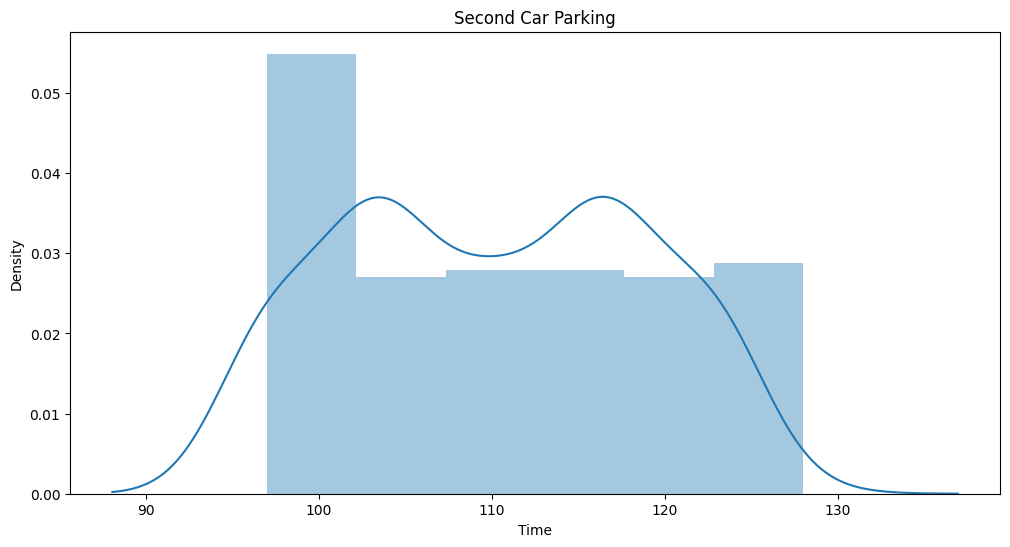

In [68]:
plt.figure(figsize=(12,6))
sns.distplot(park_assign_2['Time'])
plt.title("Second Car Parking")
plt.show()

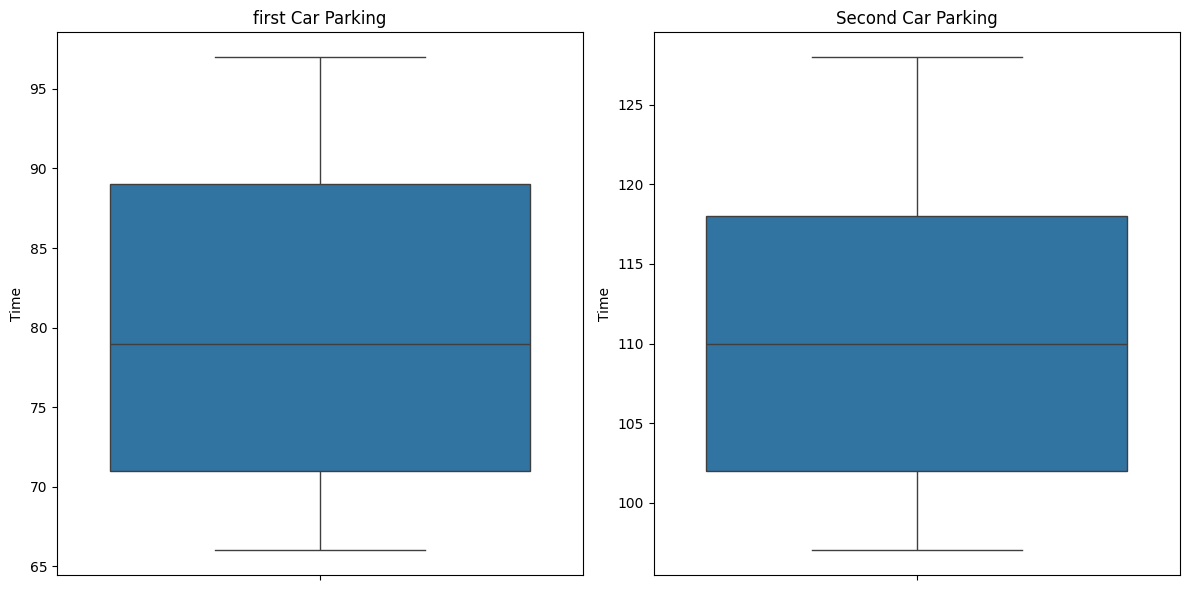

In [69]:
# Set up the figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot the first boxplot on the left subplot
sns.boxplot(x=None, y='Time', data=park_assign_1, ax=axes[0])
axes[0].set_title('first Car Parking')

# Plot the second boxplot on the right subplot
sns.boxplot(x=None, y='Time', data=park_assign_2, ax=axes[1])
axes[1].set_title('Second Car Parking')

# Adjust layout to prevent overlapping titles
plt.tight_layout()

# Show the plot
plt.show()


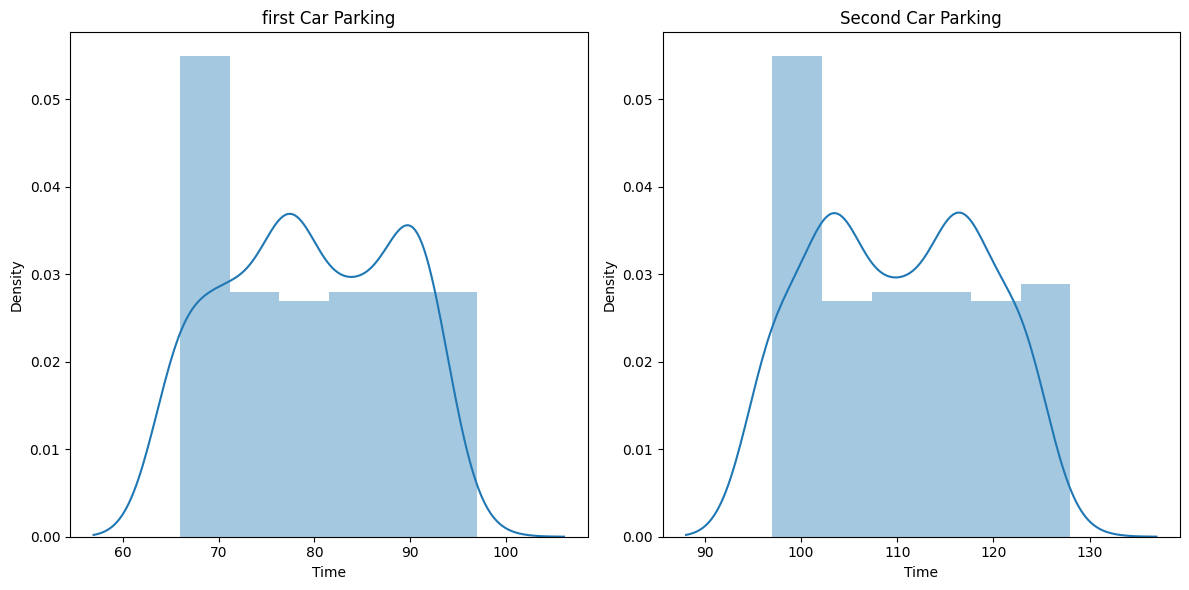

In [70]:
# Set up the figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot the first boxplot on the left subplot
sns.distplot(park_assign_1['Time'], ax=axes[0])
axes[0].set_title('first Car Parking')

# Plot the second boxplot on the right subplot
sns.distplot(park_assign_2['Time'], ax=axes[1])
axes[1].set_title('Second Car Parking')

# Adjust layout to prevent overlapping titles
plt.tight_layout()

# Show the plot
plt.show()


## Iteration 3


In [71]:
# Let's filter no 2 parking for the flats data 
flats_df_3 = new_flats_data[new_flats_data['Rank'] == 3]
flats_df_3 = flats_df_3.reset_index(drop='index')
flats_df_3.head()

,Time_To_Podium_1,Time_To_Podium_2,Time_To_Podium_3,Time_To_Podium_4,Time_To_Podium_5,Time_To_Podium_6,Time_To_Podium_7,Time_To_Podium_8,Time_To_Podium_9,Rank,unique_flat_no,key
0,26,24,22,20,18,16,14,12,10,3,3-C-1404,1
1,28,26,24,22,20,18,16,14,12,3,3-C-1504,1
2,30,28,26,24,22,20,18,16,14,3,3-C-1604,1
3,32,30,28,26,24,22,20,18,16,3,3-C-1704,1
4,34,32,30,28,26,24,22,20,18,3,3-C-1804,1


In [72]:
len(park_assign_2['Col'])
park_assign_2.head()

,Row,Col,Parking_Space,Time,Rank
0,0,177,Podium_5-89,128,2
1,1,120,Podium_5-32,123,2
2,2,119,Podium_5-31,123,2
3,3,118,Podium_5-30,123,2
4,4,135,Podium_5-47,123,2


In [73]:
parking_time_3 = parking_time_2.head(1).T.reset_index()
parking_time_3 = parking_time_3.rename(columns={"index": "Parking_Slot", 0: "Totaltime"})
parking_time_3.head()


,Parking_Slot,Totaltime
0,Podium_4-1,105
1,Podium_4-2,105
2,Podium_4-3,105
3,Podium_4-4,105
4,Podium_4-5,105


In [74]:
# Drop the assign car parking from the dataset
cols_to_drop_2 = park_assign_2['Col'].values
print(len(cols_to_drop_2))

208


In [75]:
# Filter out columns that exist in parking_time_1 & parking_time_2

cols_to_drop_existing_2 = []
for col in cols_to_drop_2:
    cols_to_drop_existing_2.append(parking_time_3.loc[col][0])
    
print(len(cols_to_drop_existing_2))
print(cols_to_drop_existing_2)



208
['Podium_5-89', 'Podium_5-32', 'Podium_5-31', 'Podium_5-30', 'Podium_5-47', 'Podium_5-46', 'Podium_5-45', 'Podium_5-44', 'Podium_5-43', 'Podium_5-42', 'Podium_5-41', 'Podium_5-40', 'Podium_5-39', 'Podium_5-38', 'Podium_5-37', 'Podium_5-36', 'Podium_5-35', 'Podium_5-34', 'Podium_5-33', 'Podium_5-4', 'Podium_5-3', 'Podium_5-2', 'Podium_5-1', 'Podium_5-59', 'Podium_5-58', 'Podium_5-57', 'Podium_5-56', 'Podium_5-55', 'Podium_5-54', 'Podium_5-53', 'Podium_5-52', 'Podium_5-51', 'Podium_5-50', 'Podium_5-49', 'Podium_5-48', 'Podium_5-29', 'Podium_5-28', 'Podium_5-27', 'Podium_5-26', 'Podium_5-25', 'Podium_5-24', 'Podium_5-23', 'Podium_5-22', 'Podium_5-21', 'Podium_5-20', 'Podium_5-19', 'Podium_5-18', 'Podium_5-17', 'Podium_5-16', 'Podium_5-15', 'Podium_5-14', 'Podium_5-13', 'Podium_5-12', 'Podium_5-11', 'Podium_5-10', 'Podium_5-9', 'Podium_5-8', 'Podium_5-7', 'Podium_5-6', 'Podium_5-5', 'Podium_4-54', 'Podium_4-53', 'Podium_4-52', 'Podium_4-51', 'Podium_4-50', 'Podium_4-49', 'Podium_4-48',

In [76]:
parking_time_3 = parking_time_2.head(1)
parking_time_3 = parking_time_3.drop(cols_to_drop_existing_2, axis=1,errors='ignore')
parking_time_3['key'] = 1
print(parking_time_3.shape)
parking_time_3

(1, 386)


,Podium_5-60,Podium_5-61,Podium_5-62,Podium_5-63,Podium_5-64,Podium_5-65,Podium_5-66,Podium_5-67,Podium_5-68,Podium_5-69,Podium_5-70,Podium_5-71,Podium_5-72,Podium_5-73,Podium_5-74,Podium_5-75,Podium_5-76,Podium_5-77,Podium_5-78,Podium_5-79,Podium_5-80,Podium_5-81,Podium_5-82,Podium_5-83,Podium_5-84,Podium_5-85,Podium_5-86,Podium_5-87,Podium_5-88,Podium_6-1,Podium_6-2,Podium_6-3,Podium_6-4,Podium_6-5,Podium_6-6,Podium_6-7,Podium_6-8,Podium_6-9,Podium_6-10,Podium_6-11,Podium_6-12,Podium_6-13,Podium_6-14,Podium_6-15,Podium_6-16,Podium_6-17,Podium_6-18,Podium_6-19,Podium_6-20,Podium_6-21,Podium_6-22,Podium_6-23,Podium_6-24,Podium_6-25,Podium_6-26,Podium_6-27,Podium_6-28,Podium_6-29,Podium_6-30,Podium_6-31,Podium_6-32,Podium_6-33,Podium_6-34,Podium_6-35,Podium_6-36,Podium_6-37,Podium_6-38,Podium_6-39,Podium_6-40,Podium_6-41,Podium_6-42,Podium_6-43,Podium_6-44,Podium_6-45,Podium_6-46,Podium_6-47,Podium_6-48,Podium_6-49,Podium_6-50,Podium_6-51,Podium_6-52,Podium_6-53,Podium_6-54,Podium_6-55,Podium_6-56,Podium_6-57,Podium_6-58,Podium_6-59,Podium_6-60,Podium_6-61,Podium_6-62,Podium_6-63,Podium_6-64,Podium_6-65,Podium_6-66,Podium_6-67,Podium_6-68,Podium_6-69,Podium_6-70,Podium_6-71,Podium_6-72,Podium_6-73,Podium_6-74,Podium_6-75,Podium_6-76,Podium_6-77,Podium_6-78,Podium_6-79,Podium_6-80,Podium_6-81,Podium_6-82,Podium_6-83,Podium_6-84,Podium_6-85,Podium_6-86,Podium_6-87,Podium_6-88,Podium_6-89,Podium_7-1,Podium_7-2,Podium_7-3,Podium_7-4,Podium_7-5,Podium_7-6,Podium_7-7,Podium_7-8,Podium_7-9,Podium_7-10,Podium_7-11,Podium_7-12,Podium_7-13,Podium_7-14,Podium_7-15,Podium_7-16,Podium_7-17,Podium_7-18,Podium_7-19,Podium_7-20,Podium_7-21,Podium_7-22,Podium_7-23,Podium_7-24,Podium_7-25,Podium_7-26,Podium_7-27,Podium_7-28,Podium_7-29,Podium_7-30,Podium_7-31,Podium_7-32,Podium_7-33,Podium_7-34,Podium_7-35,Podium_7-36,Podium_7-37,Podium_7-38,Podium_7-39,Podium_7-40,Podium_7-41,Podium_7-42,Podium_7-43,Podium_7-44,Podium_7-45,Podium_7-46,Podium_7-47,Podium_7-48,Podium_7-49,Podium_7-50,Podium_7-51,Podium_7-52,Podium_7-53,Podium_7-54,Podium_7-55,Podium_7-56,Podium_7-57,Podium_7-58,Podium_7-59,Podium_7-60,Podium_7-61,Podium_7-62,Podium_7-63,Podium_7-64,Podium_7-65,Podium_7-66,Podium_7-67,Podium_7-68,Podium_7-69,Podium_7-70,Podium_7-71,Podium_7-72,Podium_7-73,Podium_7-74,Podium_7-75,Podium_7-76,Podium_7-77,Podium_7-78,Podium_7-79,Podium_7-80,Podium_7-81,Podium_7-82,Podium_7-83,Podium_7-84,Podium_7-85,Podium_7-86,Podium_7-87,Podium_7-88,Podium_7-89,Podium_8-1,Podium_8-2,Podium_8-3,Podium_8-4,Podium_8-5,Podium_8-6,Podium_8-7,Podium_8-8,Podium_8-9,Podium_8-10,Podium_8-11,Podium_8-12,Podium_8-13,Podium_8-14,Podium_8-15,Podium_8-16,Podium_8-17,Podium_8-18,Podium_8-19,Podium_8-20,Podium_8-21,Podium_8-22,Podium_8-23,Podium_8-24,Podium_8-25,Podium_8-26,Podium_8-27,Podium_8-28,Podium_8-29,Podium_8-30,Podium_8-31,Podium_8-32,Podium_8-33,Podium_8-34,Podium_8-35,Podium_8-36,Podium_8-37,Podium_8-38,Podium_8-39,Podium_8-40,Podium_8-41,Podium_8-42,Podium_8-43,Podium_8-44,Podium_8-45,Podium_8-46,Podium_8-47,Podium_8-48,Podium_8-49,Podium_8-50,Podium_8-51,Podium_8-52,Podium_8-53,Podium_8-54,Podium_8-55,Podium_8-56,Podium_8-57,Podium_8-58,Podium_8-59,Podium_8-60,Podium_8-61,Podium_8-62,Podium_8-63,Podium_8-64,Podium_8-65,Podium_8-66,Podium_8-67,Podium_8-68,Podium_8-69,Podium_8-70,Podium_8-71,Podium_8-72,Podium_8-73,Podium_8-74,Podium_8-75,Podium_8-76,Podium_8-77,Podium_8-78,Podium_8-79,Podium_8-80,Podium_8-81,Podium_8-82,Podium_8-83,Podium_8-84,Podium_8-85,Podium_8-86,Podium_8-87,Podium_8-88,Podium_8-89,Podium_9-1,Podium_9-2,Podium_9-3,Podium_9-4,Podium_9-5,Podium_9-6,Podium_9-7,Podium_9-8,Podium_9-9,Podium_9-10,Podium_9-11,Podium_9-12,Podium_9-13,Podium_9-14,Podium_9-15,Podium_9-16,Podium_9-17,Podium_9-18,Podium_9-19,Podium_9-20,Podium_9-21,Podium_9-22,Podium_9-23,Podium_9-24,Podium_9-25,Podium_9-26,Podium_9-27,Podium_9-28,Podium_9-29,Podium_9-30,Podium_9-31,Podium_9-32,Podium_9-33,Podium_9-34,Podium_9-35,Podium_9-36,Podium_9-37,Podium_9-38,Podium_9-39,Podium_9-40,Pod

In [77]:
flats_df_3.shape

(52, 12)

In [78]:
final_df_iter_3 = pd.merge(flats_df_3, parking_time_3, on='key', how='outer')
print(final_df_iter_3.shape)

final_df_iter_3.head()

(52, 397)


,Time_To_Podium_1,Time_To_Podium_2,Time_To_Podium_3,Time_To_Podium_4,Time_To_Podium_5,Time_To_Podium_6,Time_To_Podium_7,Time_To_Podium_8,Time_To_Podium_9,Rank,unique_flat_no,key,Podium_5-60,Podium_5-61,Podium_5-62,Podium_5-63,Podium_5-64,Podium_5-65,Podium_5-66,Podium_5-67,Podium_5-68,Podium_5-69,Podium_5-70,Podium_5-71,Podium_5-72,Podium_5-73,Podium_5-74,Podium_5-75,Podium_5-76,Podium_5-77,Podium_5-78,Podium_5-79,Podium_5-80,Podium_5-81,Podium_5-82,Podium_5-83,Podium_5-84,Podium_5-85,Podium_5-86,Podium_5-87,Podium_5-88,Podium_6-1,Podium_6-2,Podium_6-3,Podium_6-4,Podium_6-5,Podium_6-6,Podium_6-7,Podium_6-8,Podium_6-9,Podium_6-10,Podium_6-11,Podium_6-12,Podium_6-13,Podium_6-14,Podium_6-15,Podium_6-16,Podium_6-17,Podium_6-18,Podium_6-19,Podium_6-20,Podium_6-21,Podium_6-22,Podium_6-23,Podium_6-24,Podium_6-25,Podium_6-26,Podium_6-27,Podium_6-28,Podium_6-29,Podium_6-30,Podium_6-31,Podium_6-32,Podium_6-33,Podium_6-34,Podium_6-35,Podium_6-36,Podium_6-37,Podium_6-38,Podium_6-39,Podium_6-40,Podium_6-41,Podium_6-42,Podium_6-43,Podium_6-44,Podium_6-45,Podium_6-46,Podium_6-47,Podium_6-48,Podium_6-49,Podium_6-50,Podium_6-51,Podium_6-52,Podium_6-53,Podium_6-54,Podium_6-55,Podium_6-56,Podium_6-57,Podium_6-58,Podium_6-59,Podium_6-60,Podium_6-61,Podium_6-62,Podium_6-63,Podium_6-64,Podium_6-65,Podium_6-66,Podium_6-67,Podium_6-68,Podium_6-69,Podium_6-70,Podium_6-71,Podium_6-72,Podium_6-73,Podium_6-74,Podium_6-75,Podium_6-76,Podium_6-77,Podium_6-78,Podium_6-79,Podium_6-80,Podium_6-81,Podium_6-82,Podium_6-83,Podium_6-84,Podium_6-85,Podium_6-86,Podium_6-87,Podium_6-88,Podium_6-89,Podium_7-1,Podium_7-2,Podium_7-3,Podium_7-4,Podium_7-5,Podium_7-6,Podium_7-7,Podium_7-8,Podium_7-9,Podium_7-10,Podium_7-11,Podium_7-12,Podium_7-13,Podium_7-14,Podium_7-15,Podium_7-16,Podium_7-17,Podium_7-18,Podium_7-19,Podium_7-20,Podium_7-21,Podium_7-22,Podium_7-23,Podium_7-24,Podium_7-25,Podium_7-26,Podium_7-27,Podium_7-28,Podium_7-29,Podium_7-30,Podium_7-31,Podium_7-32,Podium_7-33,Podium_7-34,Podium_7-35,Podium_7-36,Podium_7-37,Podium_7-38,Podium_7-39,Podium_7-40,Podium_7-41,Podium_7-42,Podium_7-43,Podium_7-44,Podium_7-45,Podium_7-46,Podium_7-47,Podium_7-48,Podium_7-49,Podium_7-50,Podium_7-51,Podium_7-52,Podium_7-53,Podium_7-54,Podium_7-55,Podium_7-56,Podium_7-57,Podium_7-58,Podium_7-59,Podium_7-60,Podium_7-61,Podium_7-62,Podium_7-63,Podium_7-64,Podium_7-65,Podium_7-66,Podium_7-67,Podium_7-68,Podium_7-69,Podium_7-70,Podium_7-71,Podium_7-72,Podium_7-73,Podium_7-74,Podium_7-75,Podium_7-76,Podium_7-77,Podium_7-78,Podium_7-79,Podium_7-80,Podium_7-81,Podium_7-82,Podium_7-83,Podium_7-84,Podium_7-85,Podium_7-86,Podium_7-87,Podium_7-88,Podium_7-89,Podium_8-1,Podium_8-2,Podium_8-3,Podium_8-4,Podium_8-5,Podium_8-6,Podium_8-7,Podium_8-8,Podium_8-9,Podium_8-10,Podium_8-11,Podium_8-12,Podium_8-13,Podium_8-14,Podium_8-15,Podium_8-16,Podium_8-17,Podium_8-18,Podium_8-19,Podium_8-20,Podium_8-21,Podium_8-22,Podium_8-23,Podium_8-24,Podium_8-25,Podium_8-26,Podium_8-27,Podium_8-28,Podium_8-29,Podium_8-30,Podium_8-31,Podium_8-32,Podium_8-33,Podium_8-34,Podium_8-35,Podium_8-36,Podium_8-37,Podium_8-38,Podium_8-39,Podium_8-40,Podium_8-41,Podium_8-42,Podium_8-43,Podium_8-44,Podium_8-45,Podium_8-46,Podium_8-47,Podium_8-48,Podium_8-49,Podium_8-50,Podium_8-51,Podium_8-52,Podium_8-53,Podium_8-54,Podium_8-55,Podium_8-56,Podium_8-57,Podium_8-58,Podium_8-59,Podium_8-60,Podium_8-61,Podium_8-62,Podium_8-63,Podium_8-64,Podium_8-65,Podium_8-66,Podium_8-67,Podium_8-68,Podium_8-69,Podium_8-70,Podium_8-71,Podium_8-72,Podium_8-73,Podium_8-74,Podium_8-75,Podium_8-76,Podium_8-77,Podium_8-78,Podium_8-79,Podium_8-80,Podium_8-81,Podium_8-82,Podium_8-83,Podium_8-84,Podium_8-85,Podium_8-86,Podium_8-87,Podium_8-88,Podium_8-89,Podium_9-1,Podium_9-2,Podium_9-3,Podium_9-4,Podium_9-5,Podium_9-6,Podium_9-7,Podium_9-8,Podium_9-9,Podium_9-10,Podium_9-11,Podium_9-12,Podium_9-13,Podium_9-14,Podium_9-15,Podium_9-16,Podium_9-17,Podium_9-18,Podium_9-19,Podium_9-20,Podium_9-21,Podium_9-22,Podium_9-23,Podium_9-24,Podium_9-25,Podium

In [79]:
final_df_iter_3 = final_df_iter_3.drop(columns=['key','Rank'])
final_df_iter_3.head()

,Time_To_Podium_1,Time_To_Podium_2,Time_To_Podium_3,Time_To_Podium_4,Time_To_Podium_5,Time_To_Podium_6,Time_To_Podium_7,Time_To_Podium_8,Time_To_Podium_9,unique_flat_no,Podium_5-60,Podium_5-61,Podium_5-62,Podium_5-63,Podium_5-64,Podium_5-65,Podium_5-66,Podium_5-67,Podium_5-68,Podium_5-69,Podium_5-70,Podium_5-71,Podium_5-72,Podium_5-73,Podium_5-74,Podium_5-75,Podium_5-76,Podium_5-77,Podium_5-78,Podium_5-79,Podium_5-80,Podium_5-81,Podium_5-82,Podium_5-83,Podium_5-84,Podium_5-85,Podium_5-86,Podium_5-87,Podium_5-88,Podium_6-1,Podium_6-2,Podium_6-3,Podium_6-4,Podium_6-5,Podium_6-6,Podium_6-7,Podium_6-8,Podium_6-9,Podium_6-10,Podium_6-11,Podium_6-12,Podium_6-13,Podium_6-14,Podium_6-15,Podium_6-16,Podium_6-17,Podium_6-18,Podium_6-19,Podium_6-20,Podium_6-21,Podium_6-22,Podium_6-23,Podium_6-24,Podium_6-25,Podium_6-26,Podium_6-27,Podium_6-28,Podium_6-29,Podium_6-30,Podium_6-31,Podium_6-32,Podium_6-33,Podium_6-34,Podium_6-35,Podium_6-36,Podium_6-37,Podium_6-38,Podium_6-39,Podium_6-40,Podium_6-41,Podium_6-42,Podium_6-43,Podium_6-44,Podium_6-45,Podium_6-46,Podium_6-47,Podium_6-48,Podium_6-49,Podium_6-50,Podium_6-51,Podium_6-52,Podium_6-53,Podium_6-54,Podium_6-55,Podium_6-56,Podium_6-57,Podium_6-58,Podium_6-59,Podium_6-60,Podium_6-61,Podium_6-62,Podium_6-63,Podium_6-64,Podium_6-65,Podium_6-66,Podium_6-67,Podium_6-68,Podium_6-69,Podium_6-70,Podium_6-71,Podium_6-72,Podium_6-73,Podium_6-74,Podium_6-75,Podium_6-76,Podium_6-77,Podium_6-78,Podium_6-79,Podium_6-80,Podium_6-81,Podium_6-82,Podium_6-83,Podium_6-84,Podium_6-85,Podium_6-86,Podium_6-87,Podium_6-88,Podium_6-89,Podium_7-1,Podium_7-2,Podium_7-3,Podium_7-4,Podium_7-5,Podium_7-6,Podium_7-7,Podium_7-8,Podium_7-9,Podium_7-10,Podium_7-11,Podium_7-12,Podium_7-13,Podium_7-14,Podium_7-15,Podium_7-16,Podium_7-17,Podium_7-18,Podium_7-19,Podium_7-20,Podium_7-21,Podium_7-22,Podium_7-23,Podium_7-24,Podium_7-25,Podium_7-26,Podium_7-27,Podium_7-28,Podium_7-29,Podium_7-30,Podium_7-31,Podium_7-32,Podium_7-33,Podium_7-34,Podium_7-35,Podium_7-36,Podium_7-37,Podium_7-38,Podium_7-39,Podium_7-40,Podium_7-41,Podium_7-42,Podium_7-43,Podium_7-44,Podium_7-45,Podium_7-46,Podium_7-47,Podium_7-48,Podium_7-49,Podium_7-50,Podium_7-51,Podium_7-52,Podium_7-53,Podium_7-54,Podium_7-55,Podium_7-56,Podium_7-57,Podium_7-58,Podium_7-59,Podium_7-60,Podium_7-61,Podium_7-62,Podium_7-63,Podium_7-64,Podium_7-65,Podium_7-66,Podium_7-67,Podium_7-68,Podium_7-69,Podium_7-70,Podium_7-71,Podium_7-72,Podium_7-73,Podium_7-74,Podium_7-75,Podium_7-76,Podium_7-77,Podium_7-78,Podium_7-79,Podium_7-80,Podium_7-81,Podium_7-82,Podium_7-83,Podium_7-84,Podium_7-85,Podium_7-86,Podium_7-87,Podium_7-88,Podium_7-89,Podium_8-1,Podium_8-2,Podium_8-3,Podium_8-4,Podium_8-5,Podium_8-6,Podium_8-7,Podium_8-8,Podium_8-9,Podium_8-10,Podium_8-11,Podium_8-12,Podium_8-13,Podium_8-14,Podium_8-15,Podium_8-16,Podium_8-17,Podium_8-18,Podium_8-19,Podium_8-20,Podium_8-21,Podium_8-22,Podium_8-23,Podium_8-24,Podium_8-25,Podium_8-26,Podium_8-27,Podium_8-28,Podium_8-29,Podium_8-30,Podium_8-31,Podium_8-32,Podium_8-33,Podium_8-34,Podium_8-35,Podium_8-36,Podium_8-37,Podium_8-38,Podium_8-39,Podium_8-40,Podium_8-41,Podium_8-42,Podium_8-43,Podium_8-44,Podium_8-45,Podium_8-46,Podium_8-47,Podium_8-48,Podium_8-49,Podium_8-50,Podium_8-51,Podium_8-52,Podium_8-53,Podium_8-54,Podium_8-55,Podium_8-56,Podium_8-57,Podium_8-58,Podium_8-59,Podium_8-60,Podium_8-61,Podium_8-62,Podium_8-63,Podium_8-64,Podium_8-65,Podium_8-66,Podium_8-67,Podium_8-68,Podium_8-69,Podium_8-70,Podium_8-71,Podium_8-72,Podium_8-73,Podium_8-74,Podium_8-75,Podium_8-76,Podium_8-77,Podium_8-78,Podium_8-79,Podium_8-80,Podium_8-81,Podium_8-82,Podium_8-83,Podium_8-84,Podium_8-85,Podium_8-86,Podium_8-87,Podium_8-88,Podium_8-89,Podium_9-1,Podium_9-2,Podium_9-3,Podium_9-4,Podium_9-5,Podium_9-6,Podium_9-7,Podium_9-8,Podium_9-9,Podium_9-10,Podium_9-11,Podium_9-12,Podium_9-13,Podium_9-14,Podium_9-15,Podium_9-16,Podium_9-17,Podium_9-18,Podium_9-19,Podium_9-20,Podium_9-21,Podium_9-22,Podium_9-23,Podium_9-24,Podium_9-25,Podium_9-26,Pod

In [80]:
podium_time_3 = final_df_iter_3.iloc[:,:10]
print(podium_time_3.shape)
podium_time_3.head()

(52, 10)


,Time_To_Podium_1,Time_To_Podium_2,Time_To_Podium_3,Time_To_Podium_4,Time_To_Podium_5,Time_To_Podium_6,Time_To_Podium_7,Time_To_Podium_8,Time_To_Podium_9,unique_flat_no
0,26,24,22,20,18,16,14,12,10,3-C-1404
1,28,26,24,22,20,18,16,14,12,3-C-1504
2,30,28,26,24,22,20,18,16,14,3-C-1604
3,32,30,28,26,24,22,20,18,16,3-C-1704
4,34,32,30,28,26,24,22,20,18,3-C-1804


In [81]:
parking_time_3 = final_df_iter_3.iloc[:,10:]
print(parking_time_3.shape)
parking_time_3.head()

(52, 385)


,Podium_5-60,Podium_5-61,Podium_5-62,Podium_5-63,Podium_5-64,Podium_5-65,Podium_5-66,Podium_5-67,Podium_5-68,Podium_5-69,Podium_5-70,Podium_5-71,Podium_5-72,Podium_5-73,Podium_5-74,Podium_5-75,Podium_5-76,Podium_5-77,Podium_5-78,Podium_5-79,Podium_5-80,Podium_5-81,Podium_5-82,Podium_5-83,Podium_5-84,Podium_5-85,Podium_5-86,Podium_5-87,Podium_5-88,Podium_6-1,Podium_6-2,Podium_6-3,Podium_6-4,Podium_6-5,Podium_6-6,Podium_6-7,Podium_6-8,Podium_6-9,Podium_6-10,Podium_6-11,Podium_6-12,Podium_6-13,Podium_6-14,Podium_6-15,Podium_6-16,Podium_6-17,Podium_6-18,Podium_6-19,Podium_6-20,Podium_6-21,Podium_6-22,Podium_6-23,Podium_6-24,Podium_6-25,Podium_6-26,Podium_6-27,Podium_6-28,Podium_6-29,Podium_6-30,Podium_6-31,Podium_6-32,Podium_6-33,Podium_6-34,Podium_6-35,Podium_6-36,Podium_6-37,Podium_6-38,Podium_6-39,Podium_6-40,Podium_6-41,Podium_6-42,Podium_6-43,Podium_6-44,Podium_6-45,Podium_6-46,Podium_6-47,Podium_6-48,Podium_6-49,Podium_6-50,Podium_6-51,Podium_6-52,Podium_6-53,Podium_6-54,Podium_6-55,Podium_6-56,Podium_6-57,Podium_6-58,Podium_6-59,Podium_6-60,Podium_6-61,Podium_6-62,Podium_6-63,Podium_6-64,Podium_6-65,Podium_6-66,Podium_6-67,Podium_6-68,Podium_6-69,Podium_6-70,Podium_6-71,Podium_6-72,Podium_6-73,Podium_6-74,Podium_6-75,Podium_6-76,Podium_6-77,Podium_6-78,Podium_6-79,Podium_6-80,Podium_6-81,Podium_6-82,Podium_6-83,Podium_6-84,Podium_6-85,Podium_6-86,Podium_6-87,Podium_6-88,Podium_6-89,Podium_7-1,Podium_7-2,Podium_7-3,Podium_7-4,Podium_7-5,Podium_7-6,Podium_7-7,Podium_7-8,Podium_7-9,Podium_7-10,Podium_7-11,Podium_7-12,Podium_7-13,Podium_7-14,Podium_7-15,Podium_7-16,Podium_7-17,Podium_7-18,Podium_7-19,Podium_7-20,Podium_7-21,Podium_7-22,Podium_7-23,Podium_7-24,Podium_7-25,Podium_7-26,Podium_7-27,Podium_7-28,Podium_7-29,Podium_7-30,Podium_7-31,Podium_7-32,Podium_7-33,Podium_7-34,Podium_7-35,Podium_7-36,Podium_7-37,Podium_7-38,Podium_7-39,Podium_7-40,Podium_7-41,Podium_7-42,Podium_7-43,Podium_7-44,Podium_7-45,Podium_7-46,Podium_7-47,Podium_7-48,Podium_7-49,Podium_7-50,Podium_7-51,Podium_7-52,Podium_7-53,Podium_7-54,Podium_7-55,Podium_7-56,Podium_7-57,Podium_7-58,Podium_7-59,Podium_7-60,Podium_7-61,Podium_7-62,Podium_7-63,Podium_7-64,Podium_7-65,Podium_7-66,Podium_7-67,Podium_7-68,Podium_7-69,Podium_7-70,Podium_7-71,Podium_7-72,Podium_7-73,Podium_7-74,Podium_7-75,Podium_7-76,Podium_7-77,Podium_7-78,Podium_7-79,Podium_7-80,Podium_7-81,Podium_7-82,Podium_7-83,Podium_7-84,Podium_7-85,Podium_7-86,Podium_7-87,Podium_7-88,Podium_7-89,Podium_8-1,Podium_8-2,Podium_8-3,Podium_8-4,Podium_8-5,Podium_8-6,Podium_8-7,Podium_8-8,Podium_8-9,Podium_8-10,Podium_8-11,Podium_8-12,Podium_8-13,Podium_8-14,Podium_8-15,Podium_8-16,Podium_8-17,Podium_8-18,Podium_8-19,Podium_8-20,Podium_8-21,Podium_8-22,Podium_8-23,Podium_8-24,Podium_8-25,Podium_8-26,Podium_8-27,Podium_8-28,Podium_8-29,Podium_8-30,Podium_8-31,Podium_8-32,Podium_8-33,Podium_8-34,Podium_8-35,Podium_8-36,Podium_8-37,Podium_8-38,Podium_8-39,Podium_8-40,Podium_8-41,Podium_8-42,Podium_8-43,Podium_8-44,Podium_8-45,Podium_8-46,Podium_8-47,Podium_8-48,Podium_8-49,Podium_8-50,Podium_8-51,Podium_8-52,Podium_8-53,Podium_8-54,Podium_8-55,Podium_8-56,Podium_8-57,Podium_8-58,Podium_8-59,Podium_8-60,Podium_8-61,Podium_8-62,Podium_8-63,Podium_8-64,Podium_8-65,Podium_8-66,Podium_8-67,Podium_8-68,Podium_8-69,Podium_8-70,Podium_8-71,Podium_8-72,Podium_8-73,Podium_8-74,Podium_8-75,Podium_8-76,Podium_8-77,Podium_8-78,Podium_8-79,Podium_8-80,Podium_8-81,Podium_8-82,Podium_8-83,Podium_8-84,Podium_8-85,Podium_8-86,Podium_8-87,Podium_8-88,Podium_8-89,Podium_9-1,Podium_9-2,Podium_9-3,Podium_9-4,Podium_9-5,Podium_9-6,Podium_9-7,Podium_9-8,Podium_9-9,Podium_9-10,Podium_9-11,Podium_9-12,Podium_9-13,Podium_9-14,Podium_9-15,Podium_9-16,Podium_9-17,Podium_9-18,Podium_9-19,Podium_9-20,Podium_9-21,Podium_9-22,Podium_9-23,Podium_9-24,Podium_9-25,Podium_9-26,Podium_9-27,Podium_9-28,Podium_9-29,Podium_9-30,Podium_9-31,Podium_9-32,Podium_9-33,Podium_9-34,Podium_9-35,Podium_9-36,Podium_9-37,Podium_9-38,Podium_9-39,Podium_9-40,Pod

In [82]:
print(parking_time_3.shape)
parking_time_3.info()

(52, 385)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Columns: 385 entries, Podium_5-60 to Podium_9-89
dtypes: int64(385)
memory usage: 156.5 KB


In [83]:
for col in podium_time_3.columns:
    #print(col[-8:])
    for j in parking_time_3.columns:
        if col[-8:] == j[:8]:
            parking_time_3[j] += podium_time_3[col]
        else:
            pass
parking_time_3.head()

,Podium_5-60,Podium_5-61,Podium_5-62,Podium_5-63,Podium_5-64,Podium_5-65,Podium_5-66,Podium_5-67,Podium_5-68,Podium_5-69,Podium_5-70,Podium_5-71,Podium_5-72,Podium_5-73,Podium_5-74,Podium_5-75,Podium_5-76,Podium_5-77,Podium_5-78,Podium_5-79,Podium_5-80,Podium_5-81,Podium_5-82,Podium_5-83,Podium_5-84,Podium_5-85,Podium_5-86,Podium_5-87,Podium_5-88,Podium_6-1,Podium_6-2,Podium_6-3,Podium_6-4,Podium_6-5,Podium_6-6,Podium_6-7,Podium_6-8,Podium_6-9,Podium_6-10,Podium_6-11,Podium_6-12,Podium_6-13,Podium_6-14,Podium_6-15,Podium_6-16,Podium_6-17,Podium_6-18,Podium_6-19,Podium_6-20,Podium_6-21,Podium_6-22,Podium_6-23,Podium_6-24,Podium_6-25,Podium_6-26,Podium_6-27,Podium_6-28,Podium_6-29,Podium_6-30,Podium_6-31,Podium_6-32,Podium_6-33,Podium_6-34,Podium_6-35,Podium_6-36,Podium_6-37,Podium_6-38,Podium_6-39,Podium_6-40,Podium_6-41,Podium_6-42,Podium_6-43,Podium_6-44,Podium_6-45,Podium_6-46,Podium_6-47,Podium_6-48,Podium_6-49,Podium_6-50,Podium_6-51,Podium_6-52,Podium_6-53,Podium_6-54,Podium_6-55,Podium_6-56,Podium_6-57,Podium_6-58,Podium_6-59,Podium_6-60,Podium_6-61,Podium_6-62,Podium_6-63,Podium_6-64,Podium_6-65,Podium_6-66,Podium_6-67,Podium_6-68,Podium_6-69,Podium_6-70,Podium_6-71,Podium_6-72,Podium_6-73,Podium_6-74,Podium_6-75,Podium_6-76,Podium_6-77,Podium_6-78,Podium_6-79,Podium_6-80,Podium_6-81,Podium_6-82,Podium_6-83,Podium_6-84,Podium_6-85,Podium_6-86,Podium_6-87,Podium_6-88,Podium_6-89,Podium_7-1,Podium_7-2,Podium_7-3,Podium_7-4,Podium_7-5,Podium_7-6,Podium_7-7,Podium_7-8,Podium_7-9,Podium_7-10,Podium_7-11,Podium_7-12,Podium_7-13,Podium_7-14,Podium_7-15,Podium_7-16,Podium_7-17,Podium_7-18,Podium_7-19,Podium_7-20,Podium_7-21,Podium_7-22,Podium_7-23,Podium_7-24,Podium_7-25,Podium_7-26,Podium_7-27,Podium_7-28,Podium_7-29,Podium_7-30,Podium_7-31,Podium_7-32,Podium_7-33,Podium_7-34,Podium_7-35,Podium_7-36,Podium_7-37,Podium_7-38,Podium_7-39,Podium_7-40,Podium_7-41,Podium_7-42,Podium_7-43,Podium_7-44,Podium_7-45,Podium_7-46,Podium_7-47,Podium_7-48,Podium_7-49,Podium_7-50,Podium_7-51,Podium_7-52,Podium_7-53,Podium_7-54,Podium_7-55,Podium_7-56,Podium_7-57,Podium_7-58,Podium_7-59,Podium_7-60,Podium_7-61,Podium_7-62,Podium_7-63,Podium_7-64,Podium_7-65,Podium_7-66,Podium_7-67,Podium_7-68,Podium_7-69,Podium_7-70,Podium_7-71,Podium_7-72,Podium_7-73,Podium_7-74,Podium_7-75,Podium_7-76,Podium_7-77,Podium_7-78,Podium_7-79,Podium_7-80,Podium_7-81,Podium_7-82,Podium_7-83,Podium_7-84,Podium_7-85,Podium_7-86,Podium_7-87,Podium_7-88,Podium_7-89,Podium_8-1,Podium_8-2,Podium_8-3,Podium_8-4,Podium_8-5,Podium_8-6,Podium_8-7,Podium_8-8,Podium_8-9,Podium_8-10,Podium_8-11,Podium_8-12,Podium_8-13,Podium_8-14,Podium_8-15,Podium_8-16,Podium_8-17,Podium_8-18,Podium_8-19,Podium_8-20,Podium_8-21,Podium_8-22,Podium_8-23,Podium_8-24,Podium_8-25,Podium_8-26,Podium_8-27,Podium_8-28,Podium_8-29,Podium_8-30,Podium_8-31,Podium_8-32,Podium_8-33,Podium_8-34,Podium_8-35,Podium_8-36,Podium_8-37,Podium_8-38,Podium_8-39,Podium_8-40,Podium_8-41,Podium_8-42,Podium_8-43,Podium_8-44,Podium_8-45,Podium_8-46,Podium_8-47,Podium_8-48,Podium_8-49,Podium_8-50,Podium_8-51,Podium_8-52,Podium_8-53,Podium_8-54,Podium_8-55,Podium_8-56,Podium_8-57,Podium_8-58,Podium_8-59,Podium_8-60,Podium_8-61,Podium_8-62,Podium_8-63,Podium_8-64,Podium_8-65,Podium_8-66,Podium_8-67,Podium_8-68,Podium_8-69,Podium_8-70,Podium_8-71,Podium_8-72,Podium_8-73,Podium_8-74,Podium_8-75,Podium_8-76,Podium_8-77,Podium_8-78,Podium_8-79,Podium_8-80,Podium_8-81,Podium_8-82,Podium_8-83,Podium_8-84,Podium_8-85,Podium_8-86,Podium_8-87,Podium_8-88,Podium_8-89,Podium_9-1,Podium_9-2,Podium_9-3,Podium_9-4,Podium_9-5,Podium_9-6,Podium_9-7,Podium_9-8,Podium_9-9,Podium_9-10,Podium_9-11,Podium_9-12,Podium_9-13,Podium_9-14,Podium_9-15,Podium_9-16,Podium_9-17,Podium_9-18,Podium_9-19,Podium_9-20,Podium_9-21,Podium_9-22,Podium_9-23,Podium_9-24,Podium_9-25,Podium_9-26,Podium_9-27,Podium_9-28,Podium_9-29,Podium_9-30,Podium_9-31,Podium_9-32,Podium_9-33,Podium_9-34,Podium_9-35,Podium_9-36,Podium_9-37,Podium_9-38,Podium_9-39,Podium_9-40,Pod

In [84]:
parking_time_3.tail()

,Podium_5-60,Podium_5-61,Podium_5-62,Podium_5-63,Podium_5-64,Podium_5-65,Podium_5-66,Podium_5-67,Podium_5-68,Podium_5-69,Podium_5-70,Podium_5-71,Podium_5-72,Podium_5-73,Podium_5-74,Podium_5-75,Podium_5-76,Podium_5-77,Podium_5-78,Podium_5-79,Podium_5-80,Podium_5-81,Podium_5-82,Podium_5-83,Podium_5-84,Podium_5-85,Podium_5-86,Podium_5-87,Podium_5-88,Podium_6-1,Podium_6-2,Podium_6-3,Podium_6-4,Podium_6-5,Podium_6-6,Podium_6-7,Podium_6-8,Podium_6-9,Podium_6-10,Podium_6-11,Podium_6-12,Podium_6-13,Podium_6-14,Podium_6-15,Podium_6-16,Podium_6-17,Podium_6-18,Podium_6-19,Podium_6-20,Podium_6-21,Podium_6-22,Podium_6-23,Podium_6-24,Podium_6-25,Podium_6-26,Podium_6-27,Podium_6-28,Podium_6-29,Podium_6-30,Podium_6-31,Podium_6-32,Podium_6-33,Podium_6-34,Podium_6-35,Podium_6-36,Podium_6-37,Podium_6-38,Podium_6-39,Podium_6-40,Podium_6-41,Podium_6-42,Podium_6-43,Podium_6-44,Podium_6-45,Podium_6-46,Podium_6-47,Podium_6-48,Podium_6-49,Podium_6-50,Podium_6-51,Podium_6-52,Podium_6-53,Podium_6-54,Podium_6-55,Podium_6-56,Podium_6-57,Podium_6-58,Podium_6-59,Podium_6-60,Podium_6-61,Podium_6-62,Podium_6-63,Podium_6-64,Podium_6-65,Podium_6-66,Podium_6-67,Podium_6-68,Podium_6-69,Podium_6-70,Podium_6-71,Podium_6-72,Podium_6-73,Podium_6-74,Podium_6-75,Podium_6-76,Podium_6-77,Podium_6-78,Podium_6-79,Podium_6-80,Podium_6-81,Podium_6-82,Podium_6-83,Podium_6-84,Podium_6-85,Podium_6-86,Podium_6-87,Podium_6-88,Podium_6-89,Podium_7-1,Podium_7-2,Podium_7-3,Podium_7-4,Podium_7-5,Podium_7-6,Podium_7-7,Podium_7-8,Podium_7-9,Podium_7-10,Podium_7-11,Podium_7-12,Podium_7-13,Podium_7-14,Podium_7-15,Podium_7-16,Podium_7-17,Podium_7-18,Podium_7-19,Podium_7-20,Podium_7-21,Podium_7-22,Podium_7-23,Podium_7-24,Podium_7-25,Podium_7-26,Podium_7-27,Podium_7-28,Podium_7-29,Podium_7-30,Podium_7-31,Podium_7-32,Podium_7-33,Podium_7-34,Podium_7-35,Podium_7-36,Podium_7-37,Podium_7-38,Podium_7-39,Podium_7-40,Podium_7-41,Podium_7-42,Podium_7-43,Podium_7-44,Podium_7-45,Podium_7-46,Podium_7-47,Podium_7-48,Podium_7-49,Podium_7-50,Podium_7-51,Podium_7-52,Podium_7-53,Podium_7-54,Podium_7-55,Podium_7-56,Podium_7-57,Podium_7-58,Podium_7-59,Podium_7-60,Podium_7-61,Podium_7-62,Podium_7-63,Podium_7-64,Podium_7-65,Podium_7-66,Podium_7-67,Podium_7-68,Podium_7-69,Podium_7-70,Podium_7-71,Podium_7-72,Podium_7-73,Podium_7-74,Podium_7-75,Podium_7-76,Podium_7-77,Podium_7-78,Podium_7-79,Podium_7-80,Podium_7-81,Podium_7-82,Podium_7-83,Podium_7-84,Podium_7-85,Podium_7-86,Podium_7-87,Podium_7-88,Podium_7-89,Podium_8-1,Podium_8-2,Podium_8-3,Podium_8-4,Podium_8-5,Podium_8-6,Podium_8-7,Podium_8-8,Podium_8-9,Podium_8-10,Podium_8-11,Podium_8-12,Podium_8-13,Podium_8-14,Podium_8-15,Podium_8-16,Podium_8-17,Podium_8-18,Podium_8-19,Podium_8-20,Podium_8-21,Podium_8-22,Podium_8-23,Podium_8-24,Podium_8-25,Podium_8-26,Podium_8-27,Podium_8-28,Podium_8-29,Podium_8-30,Podium_8-31,Podium_8-32,Podium_8-33,Podium_8-34,Podium_8-35,Podium_8-36,Podium_8-37,Podium_8-38,Podium_8-39,Podium_8-40,Podium_8-41,Podium_8-42,Podium_8-43,Podium_8-44,Podium_8-45,Podium_8-46,Podium_8-47,Podium_8-48,Podium_8-49,Podium_8-50,Podium_8-51,Podium_8-52,Podium_8-53,Podium_8-54,Podium_8-55,Podium_8-56,Podium_8-57,Podium_8-58,Podium_8-59,Podium_8-60,Podium_8-61,Podium_8-62,Podium_8-63,Podium_8-64,Podium_8-65,Podium_8-66,Podium_8-67,Podium_8-68,Podium_8-69,Podium_8-70,Podium_8-71,Podium_8-72,Podium_8-73,Podium_8-74,Podium_8-75,Podium_8-76,Podium_8-77,Podium_8-78,Podium_8-79,Podium_8-80,Podium_8-81,Podium_8-82,Podium_8-83,Podium_8-84,Podium_8-85,Podium_8-86,Podium_8-87,Podium_8-88,Podium_8-89,Podium_9-1,Podium_9-2,Podium_9-3,Podium_9-4,Podium_9-5,Podium_9-6,Podium_9-7,Podium_9-8,Podium_9-9,Podium_9-10,Podium_9-11,Podium_9-12,Podium_9-13,Podium_9-14,Podium_9-15,Podium_9-16,Podium_9-17,Podium_9-18,Podium_9-19,Podium_9-20,Podium_9-21,Podium_9-22,Podium_9-23,Podium_9-24,Podium_9-25,Podium_9-26,Podium_9-27,Podium_9-28,Podium_9-29,Podium_9-30,Podium_9-31,Podium_9-32,Podium_9-33,Podium_9-34,Podium_9-35,Podium_9-36,Podium_9-37,Podium_9-38,Podium_9-39,Podium_9-40,Pod

In [85]:
parking_time_3 = parking_time_3.apply(pd.to_numeric)
parking_time_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Columns: 385 entries, Podium_5-60 to Podium_9-89
dtypes: int64(385)
memory usage: 156.5 KB


In [86]:
# Let' calculate the no of rows need to be added to convert parking_time_2 to square matrix

matrix_col_3 = parking_time_3.shape[1]
matrix_row_3 = parking_time_3.shape[0]

matrix_col_2-matrix_row_2

385

In [87]:
zero_rows_3 = pd.DataFrame(np.zeros((matrix_col_3-matrix_row_3, matrix_col_3)), columns=parking_time_3.columns)
zero_rows_3.shape

(333, 385)

In [88]:
parking_time_3_matrix = pd.concat([parking_time_3,zero_rows_3],axis=0)
parking_time_3_matrix.shape

(385, 385)

In [89]:
parking_matrix_3 = parking_time_3_matrix.values
parking_matrix_3

array([[146., 146., 146., ..., 190., 190., 190.],
       [148., 148., 148., ..., 192., 192., 192.],
       [150., 150., 150., ..., 194., 194., 194.],
       ...,
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.]])

In [90]:
iter3 = parking_time_3.shape[0]-1

In [91]:
m = Munkres()
indexes_3 = m.compute(parking_matrix_3)
total =0 

data = []
for row, col in indexes_3:
    values = parking_matrix_3[row][col]
    total += values
    data.append((row,col,total))


park_assign_3 = pd.DataFrame(data, columns=['Row', 'Col', 'total'])
park_assign_3 = park_assign_3.loc[:iter3,:]
park_assign_3.head()

,Row,Col,total
0,0,44,0.0
1,1,43,0.0
2,2,42,0.0
3,3,41,0.0
4,4,40,0.0


In [92]:
park_assign_3['Rank'] = 1
park_assign_3.shape

(52, 4)

In [93]:
parking_time_3.shape

(52, 385)

In [94]:
parking_time_df_3 = parking_time_3.head(1).T.reset_index()
# Chnage the name of the column
parking_time_df_3.columns = ['Parking_space', 'total_time']

print(parking_time_df_3.shape)

parking_time_df_3.head()

(385, 2)


,Parking_space,total_time
0,Podium_5-60,146
1,Podium_5-61,146
2,Podium_5-62,146
3,Podium_5-63,146
4,Podium_5-64,146


In [95]:
parkinglist_3 = []
totaltime_list_3 = []
for i in park_assign_3['Col']:
    parkinglist_3.append(parking_time_df_3.loc[i][0])
    totaltime_list_3.append(parking_time_df_3.loc[i][1])

# Convert the parkinglist and totaltime_list to df
parkingtime_df_3 = pd.DataFrame({'Parking_Space': parkinglist_3, 'Time': totaltime_list_3})
print(parkingtime_df_3.shape)
parkingtime_df_3.head()
    


(52, 2)


,Parking_Space,Time
0,Podium_6-16,147
1,Podium_6-15,147
2,Podium_6-14,147
3,Podium_6-13,147
4,Podium_6-12,147


In [96]:

print(park_assign_3.shape)
print(parkingtime_df_3.shape)

park_assign_3 = pd.merge(park_assign_3, parkingtime_df_3,left_index=True, right_index=True)
print(park_assign_3.shape)
park_assign_3.head(10)



(52, 4)
(52, 2)
(52, 6)


,Row,Col,total,Rank,Parking_Space,Time
0,0,44,0.0,1,Podium_6-16,147
1,1,43,0.0,1,Podium_6-15,147
2,2,42,0.0,1,Podium_6-14,147
3,3,41,0.0,1,Podium_6-13,147
4,4,40,0.0,1,Podium_6-12,147
5,5,39,0.0,1,Podium_6-11,147
6,6,38,0.0,1,Podium_6-10,147
7,7,37,0.0,1,Podium_6-9,147
8,8,36,0.0,1,Podium_6-8,147
9,9,35,0.0,1,Podium_6-7,147


In [97]:
park_assign_3 = park_assign_3.drop(columns=['Rank','total'])
park_assign_3['Rank'] = 3

print(park_assign_3.shape)
park_assign_3.head()

(52, 5)


,Row,Col,Parking_Space,Time,Rank
0,0,44,Podium_6-16,147,3
1,1,43,Podium_6-15,147,3
2,2,42,Podium_6-14,147,3
3,3,41,Podium_6-13,147,3
4,4,40,Podium_6-12,147,3


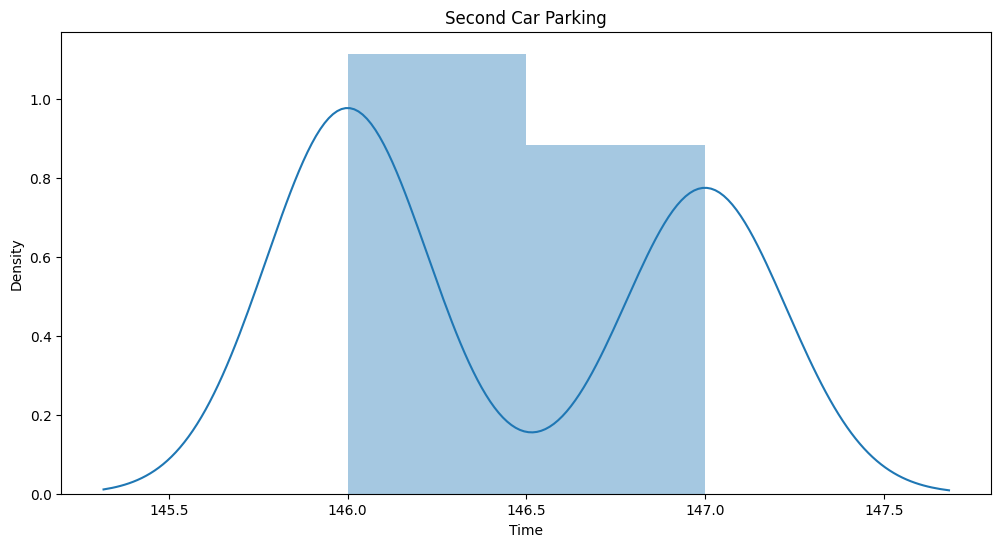

In [98]:
plt.figure(figsize=(12,6))
sns.distplot(park_assign_3['Time'])
plt.title("Second Car Parking")
plt.show()

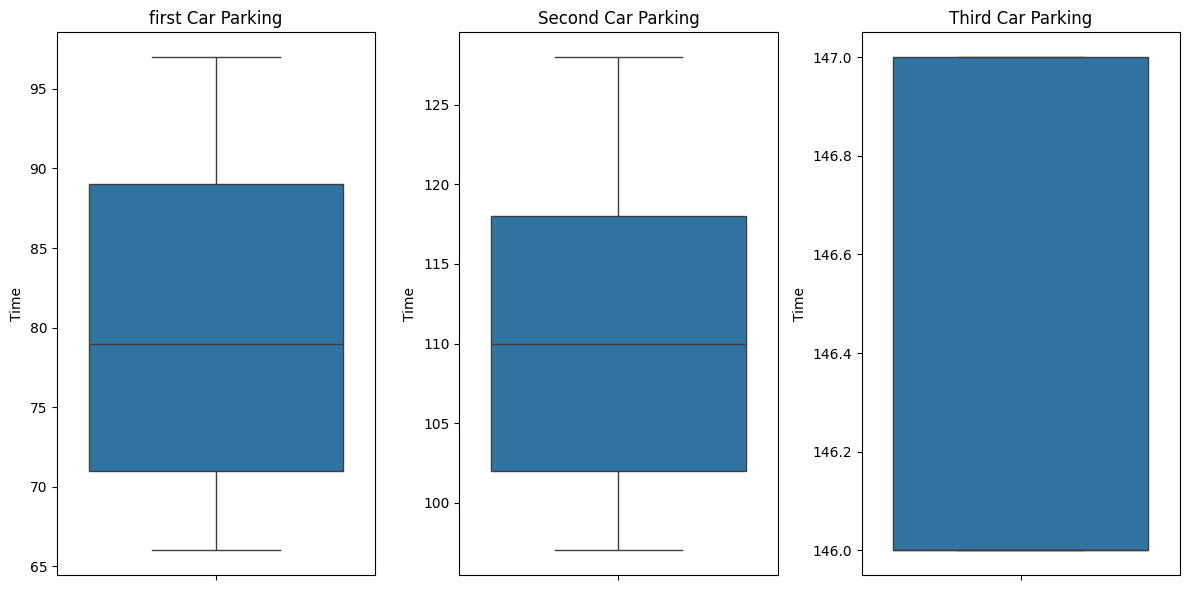

In [99]:
# Set up the figure with two subplots side by side
fig, axes = plt.subplots(1, 3, figsize=(12, 6))

# Plot the first boxplot on the left subplot
sns.boxplot(x=None, y='Time', data=park_assign_1, ax=axes[0])
axes[0].set_title('first Car Parking')

# Plot the second boxplot on the right subplot
sns.boxplot(x=None, y='Time', data=park_assign_2, ax=axes[1])
axes[1].set_title('Second Car Parking')

# Plot the third boxplot on the right subplot
sns.boxplot(x=None, y='Time', data=park_assign_3, ax=axes[2])
axes[2].set_title('Third Car Parking')

# Adjust layout to prevent overlapping titles
plt.tight_layout()

# Show the plot
plt.show()


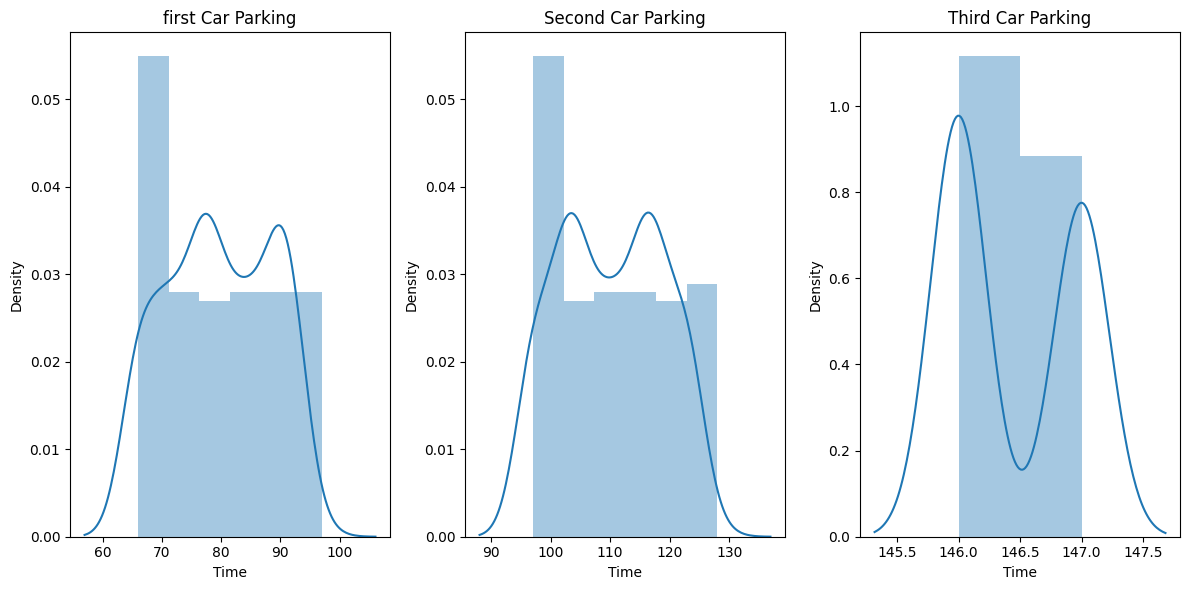

In [100]:
 # Set up the figure with two subplots side by side
fig, axes = plt.subplots(1, 3, figsize=(12, 6))

# Plot the first boxplot on the left subplot
sns.distplot(park_assign_1['Time'], ax=axes[0])
axes[0].set_title('first Car Parking')

# Plot the second boxplot on the right subplot
sns.distplot(park_assign_2['Time'], ax=axes[1])
axes[1].set_title('Second Car Parking')

# Plot the third boxplot on the right subplot
sns.distplot(park_assign_3['Time'], ax=axes[2])
axes[2].set_title('Third Car Parking')

# Adjust layout to prevent overlapping titles
plt.tight_layout()

# Show the plot
plt.show()


<Axes: ylabel='Time'>

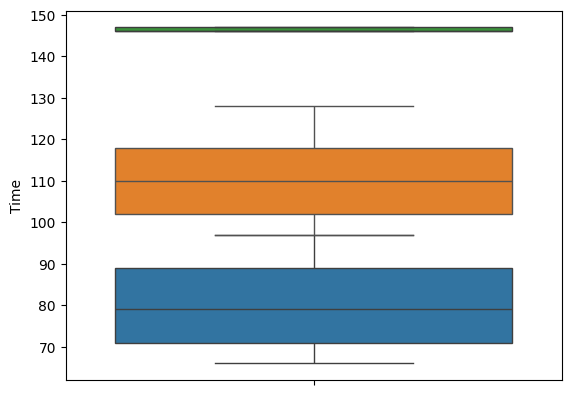

In [101]:
sns.boxplot(park_assign_1['Time'])
sns.boxplot(park_assign_2['Time'])
sns.boxplot(park_assign_3['Time'])

In [110]:
park_assign_1.columns,park_assign_2.columns,park_assign_3.columns

(Index(['Row', 'Col', 'Parking_Space', 'Time', 'Rank'], dtype='object'),
 Index(['Row', 'Col', 'Parking_Space', 'Time', 'Rank'], dtype='object'),
 Index(['Row', 'Col', 'Parking_Space', 'Time', 'Rank'], dtype='object'))

In [109]:
flats_df_2

,Time_To_Podium_1,Time_To_Podium_2,Time_To_Podium_3,Time_To_Podium_4,Time_To_Podium_5,Time_To_Podium_6,Time_To_Podium_7,Time_To_Podium_8,Time_To_Podium_9,Rank,unique_flat_no,key
0,26,24,22,20,18,16,14,12,10,2,2-C-1401,1
1,26,24,22,20,18,16,14,12,10,2,2-C-1402,1
2,26,24,22,20,18,16,14,12,10,2,2-C-1403,1
3,26,24,22,20,18,16,14,12,10,2,2-C-1404,1
4,28,26,24,22,20,18,16,14,12,2,2-C-1501,1
...,...,...,...,...,...,...,...,...,...,...,...,...
203,12,14,16,18,20,22,24,26,28,2,2-C-6404,1
204,10,12,14,16,18,20,22,24,26,2,2-C-6501,1
205,10,12,14,16,18,20,22,24,26,2,2-C-6502,1
206,10,12,14,16,18,20,22,24,26,2,2-C-6503,1


In [111]:
for i in park_assign_1['Row']:
    park_assign_1['Row'][i] = flats_df_1['unique_flat_no'][i]
park_assign_1.head()


    

KeyError: '1-C-1401'

In [112]:
for j in park_assign_2['Row']:
    park_assign_2['Row'][j] = flats_df_2['unique_flat_no'][j]
park_assign_2.head()


,Row,Col,Parking_Space,Time,Rank
0,2-C-1401,177,Podium_5-89,128,2
1,2-C-1402,120,Podium_5-32,123,2
2,2-C-1403,119,Podium_5-31,123,2
3,2-C-1404,118,Podium_5-30,123,2
4,2-C-1501,135,Podium_5-47,123,2


In [113]:
for i in park_assign_3['Row']:
    park_assign_3['Row'][i] = flats_df_3['unique_flat_no'][i]
park_assign_3.head()


,Row,Col,Parking_Space,Time,Rank
0,3-C-1404,44,Podium_6-16,147,3
1,3-C-1504,43,Podium_6-15,147,3
2,3-C-1604,42,Podium_6-14,147,3
3,3-C-1704,41,Podium_6-13,147,3
4,3-C-1804,40,Podium_6-12,147,3


In [114]:
park_assign_1.columns,park_assign_2.columns,park_assign_3.columns

(Index(['Row', 'Col', 'Parking_Space', 'Time', 'Rank'], dtype='object'),
 Index(['Row', 'Col', 'Parking_Space', 'Time', 'Rank'], dtype='object'),
 Index(['Row', 'Col', 'Parking_Space', 'Time', 'Rank'], dtype='object'))

In [115]:
concatenated_df = pd.concat([park_assign_1, park_assign_2, park_assign_3])
concatenated_df

,Row,Col,Parking_Space,Time,Rank
0,1-C-1401,547,Podium_3-14,92,1
1,1-C-1402,546,Podium_3-13,92,1
2,1-C-1403,545,Podium_3-12,92,1
3,1-C-1404,544,Podium_3-11,92,1
4,1-C-1501,543,Podium_3-10,92,1
...,...,...,...,...,...
47,3-C-6104,9,Podium_5-69,146,3
48,3-C-6204,8,Podium_5-68,146,3
49,3-C-6304,7,Podium_5-67,146,3
50,3-C-6404,6,Podium_5-66,146,3


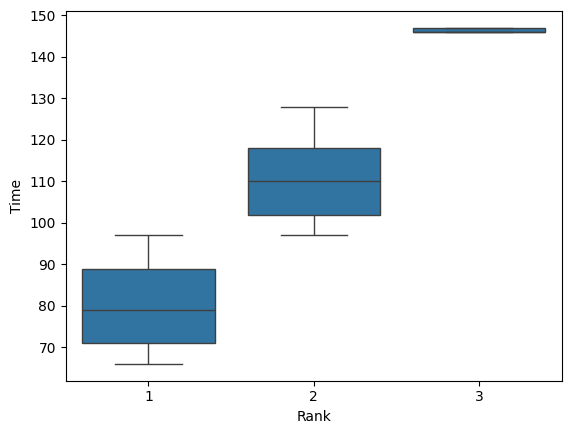

In [116]:
sns.boxplot(data=concatenated_df, x="Rank", y="Time")
plt.show()